# Importar librerías

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mlt
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline

# Crear dataframe principal

Primero, creamos un dataframe usando el dataset 'Datos_abiertos_matriculas_2016_1_2024_1.csv'

In [ ]:
filePath = '/content/drive/MyDrive/Archivos para Exprésate Perú con Datos 2/Datasets Prueba/Alumnos matriculados en la Universidad Nacional de Ingeniería - [UNI]/Datos_abiertos_matriculas_2016_1_2024_1.csv'

# Sube el dataset original al Colab para correr este código
#filePath = 'Datos_abiertos_matriculas_2016_1_2024_1.csv'
df_alumnosUNI = pd.read_csv(filePath)
df_alumnosUNI.loc[df_alumnosUNI.NACIMIENTO_PAIS == 'rusia', 'NACIMIENTO_PAIS'] = 'Rusia'

# Creamos de una vez la columna SEMEST, y nos quedamos con las columnas que sí vamos a usar para el prototipo y les cambiamos el nombre.
df_alumnosUNI['SEMEST'] = df_alumnosUNI['ANIO'].astype(str) + '-' + df_alumnosUNI['PERIODO'].astype(str)
df_alumnosUNI = df_alumnosUNI[['IDHASH', 'SEMEST', 'TIPO_MATRICULA', 'DOMICILIO_DEPA', 'ANIO_NACIMIENTO', 'SEXO', 'MODALIDAD', 'FACULTAD', 'ESPECIALIDAD', 'CICLO_RELATIVO']]
df_alumnosUNI.columns = ['IDHASH', 'SEMEST', 'MATRICULA_T', 'DEPA_HOME', 'NAC_Y', 'SEX', 'MODALIDAD', 'FACULTAD', 'ESPECIALIDAD', 'C_R']
df_alumnosUNI = df_alumnosUNI.sort_values(['SEMEST', 'IDHASH']).reset_index(drop=True)

# En caso veas los datos de las columnas NAC_Y y C_R como decimales, quítale el hashtag a estas líneas de código
#df_alumnosUNI.NAC_Y = df_alumnosUNI.NAC_Y.astype(int)
#df_alumnosUNI.C_R = df_alumnosUNI.C_R.astype(int)

df_alumnosUNI.head()

,IDHASH,SEMEST,MATRICULA_T,DEPA_HOME,NAC_Y,SEX,MODALIDAD,FACULTAD,ESPECIALIDAD,C_R
0,0005769B3CA7B05EB2305248FE46234C4EB3ECC0934686...,2016-1,Regulares,LIMA,1995,FEMENINO,ORDINARIO,"INGENIERÍA DE PETRÓLEO, GAS NATURAL Y PETROQUÍ...",INGENIERÍA PETROQUÍMICA,8
1,0009AA652BEE77D36595E9D0CCE52094EE0C8D94202EEF...,2016-1,Regulares,LIMA,1994,MASCULINO,ORDINARIO,INGENIERÍA INDUSTRIAL Y DE SISTEMAS,INGENIERÍA DE SISTEMAS,4
2,000FD2AF9E9C7D54940A345F9410930205ED72ADB83E42...,2016-1,Regulares,AMAZONAS,1997,MASCULINO,INGRESO DIRECTO,"INGENIERÍA ECONÓMICA, ESTADÍSTICA Y CIENCIAS S...",INGENIERÍA ESTADÍSTICA,3
3,0012E5A6471CD45EE23E2DFF4D9665C0D0366BC90CB5CF...,2016-1,Regulares,LIMA,1996,MASCULINO,ORDINARIO,"INGENIERÍA GEOLÓGICA, MINERA Y METALÚRGICA",INGENIERÍA DE MINAS,1
4,00185B719CA6D941F5C5074958F064FB4E90B73BC3CD50...,2016-1,Regulares,LIMA,1990,MASCULINO,INGRESO DIRECTO CEPRE-UNI,"INGENIERÍA ECONÓMICA, ESTADÍSTICA Y CIENCIAS S...",INGENIERÍA ECONÓMICA,6


## Cambiar tamaños de letra

In [ ]:
df_alumnosUNI.DEPA_HOME = df_alumnosUNI.DEPA_HOME.str.title()
df_alumnosUNI.SEX = df_alumnosUNI.SEX.str.title()
df_alumnosUNI.MODALIDAD = df_alumnosUNI.MODALIDAD.str.title()
df_alumnosUNI.FACULTAD = df_alumnosUNI.FACULTAD.str.title()
df_alumnosUNI.ESPECIALIDAD = df_alumnosUNI.ESPECIALIDAD.str.title()
df_alumnosUNI.head()

,IDHASH,SEMEST,MATRICULA_T,DEPA_HOME,NAC_Y,SEX,MODALIDAD,FACULTAD,ESPECIALIDAD,C_R
0,0005769B3CA7B05EB2305248FE46234C4EB3ECC0934686...,2016-1,Regulares,Lima,1995,Femenino,Ordinario,"Ingeniería De Petróleo, Gas Natural Y Petroquí...",Ingeniería Petroquímica,8
1,0009AA652BEE77D36595E9D0CCE52094EE0C8D94202EEF...,2016-1,Regulares,Lima,1994,Masculino,Ordinario,Ingeniería Industrial Y De Sistemas,Ingeniería De Sistemas,4
2,000FD2AF9E9C7D54940A345F9410930205ED72ADB83E42...,2016-1,Regulares,Amazonas,1997,Masculino,Ingreso Directo,"Ingeniería Económica, Estadística Y Ciencias S...",Ingeniería Estadística,3
3,0012E5A6471CD45EE23E2DFF4D9665C0D0366BC90CB5CF...,2016-1,Regulares,Lima,1996,Masculino,Ordinario,"Ingeniería Geológica, Minera Y Metalúrgica",Ingeniería De Minas,1
4,00185B719CA6D941F5C5074958F064FB4E90B73BC3CD50...,2016-1,Regulares,Lima,1990,Masculino,Ingreso Directo Cepre-Uni,"Ingeniería Económica, Estadística Y Ciencias S...",Ingeniería Económica,6


# Tratar valores nulos

Revisamos qué columnas contienen nulls y cuáles no.

In [ ]:
df_alumnosUNI.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192389 entries, 0 to 192388
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   IDHASH        192389 non-null  object
 1   SEMEST        192389 non-null  object
 2   MATRICULA_T   192389 non-null  object
 3   DEPA_HOME     190898 non-null  object
 4   NAC_Y         192389 non-null  int64 
 5   SEX           192389 non-null  object
 6   MODALIDAD     192389 non-null  object
 7   FACULTAD      192389 non-null  object
 8   ESPECIALIDAD  192389 non-null  object
 9   C_R           192389 non-null  int64 
dtypes: int64(2), object(8)
memory usage: 14.7+ MB


A diferencia de cuando hicimos el análisis por primera vez, tenemos SÓLO 1 columna con valores nulos, o nulls.

Revisamos qué filas contienen al menos un dato null.

In [ ]:
df_alumnosUNI[df_alumnosUNI.isnull().any(axis=1)]

,IDHASH,SEMEST,MATRICULA_T,DEPA_HOME,NAC_Y,SEX,MODALIDAD,FACULTAD,ESPECIALIDAD,C_R
17,006E02166802EDA20F2D4022BCED7FF08BB451E16244D8...,2016-1,Regulares,NaN,1967,Masculino,Ordinario,"Arquitectura, Urbanismo Y Artes",Arquitectura,3
67,01DE4CD6F612487E51EF4FF32441843F537D8DF16EBF6E...,2016-1,Regulares,NaN,1995,Masculino,Concurso Nacional Escolar,"Ingeniería Geológica, Minera Y Metalúrgica",Ingeniería Geológica,7
105,02CBFD44FD603C7ED1FD175387E892E33A7F58BDE96038...,2016-1,Cachimbos,NaN,1997,Masculino,Ordinario,"Ingeniería Económica, Estadística Y Ciencias S...",Ingeniería Económica,1
183,049F8A2329C8866F8A47B32A1577A02942740D6A485B59...,2016-1,Regulares,NaN,1996,Masculino,Ordinario,Ingeniería Ambiental,Ingeniería Sanitaria,8
563,0F0DEBD0A0E0A07E6C3279C8FDE9D6A0CD339294C80703...,2016-1,Regulares,NaN,1999,Masculino,Ordinario,Ingeniería Eléctrica Y Electrónica,Ingeniería Eléctrica,2
...,...,...,...,...,...,...,...,...,...,...
191972,F6D77EB3351AC73B9A813F80429B62475078007A0B6517...,2024-1,Cachimbos,NaN,2007,Masculino,Ordinario,Ingeniería Eléctrica Y Electrónica,Ingeniería Electrónica,1
192027,F819C0C9516BB525F710DBF076BAED18549E192181C0E2...,2024-1,Regulares,NaN,1983,Masculino,Ordinario,Ciencias,Matemática,8
192088,F9E2CC6045EFBF1F11DA175AB7007100A69524B2BF492C...,2024-1,Regulares,NaN,2000,Masculino,Ingreso Directo Cepre-Uni,"Ingeniería Económica, Estadística Y Ciencias S...",Ingeniería Estadística,1
192228,FCE4D0714F9E88201B5FC989AFDE07C7CAD4B267A6DA56...,2024-1,Cachimbos,NaN,2006,Masculino,Ingreso Escolar Nacional,Ingeniería Civil,Ingeniería Civil,1


Reemplazamos estos valores nulos por la moda de DEPA_HOME.

In [ ]:
print("Moda en DEPA_HOME: " + str(df_alumnosUNI.DEPA_HOME.mode()[0]))

Moda en DEPA_HOME: Lima


In [ ]:
df_alumnosUNI.DEPA_HOME.fillna(df_alumnosUNI.DEPA_HOME.mode()[0], inplace=True)
df_alumnosUNI.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192389 entries, 0 to 192388
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   IDHASH        192389 non-null  object
 1   SEMEST        192389 non-null  object
 2   MATRICULA_T   192389 non-null  object
 3   DEPA_HOME     192389 non-null  object
 4   NAC_Y         192389 non-null  int64 
 5   SEX           192389 non-null  object
 6   MODALIDAD     192389 non-null  object
 7   FACULTAD      192389 non-null  object
 8   ESPECIALIDAD  192389 non-null  object
 9   C_R           192389 non-null  int64 
dtypes: int64(2), object(8)
memory usage: 14.7+ MB


Listo! Ya no tenemos nulos.

# Ajustar dataset

Ahora sí, vamos a modificar nuestros dataframes, tanto el principal como el extra.

El dataset tiene que ajustarse de acuerdo a los requisitos para postular a la beca:

- Rendimiento académico (más que) perfecto: Un R. A. actual mayor o igual al 100%
- Mínimo haberse matriculado unos 6 semestres.
- Estudiantes que se hayan matriculado en el semestre 2024-1.
- Haber faltado matricularse máximo 1 semestre.
- Haber estudiado desde el primer ciclo relativo.
- En caso de tener un R. A. mayor al 100%, evitar saltos de ciclos irreales.

Haremos el primer, segundo y tercer punto en esta sección.

Aprovechando, crearemos el dataframe extra, donde guardaremos:

- IDHASH e ID resumido
- Primer y último semestre registrado de las matrículas del estudiante
- Rendimiento Académico actual del estudiante

In [ ]:
dfID = df_alumnosUNI.loc[df_alumnosUNI.groupby('IDHASH')['SEMEST'].idxmax()][['IDHASH', 'ESPECIALIDAD']]
dfID = pd.merge(df_alumnosUNI, dfID, on=['IDHASH', 'ESPECIALIDAD'], how='inner')
dfID = dfID.groupby('IDHASH').agg(L_C=('C_R', 'max'), F_C=('C_R', 'min'), T_M=('C_R', 'count'), F_SEM=('SEMEST', 'min'), L_SEM=('SEMEST', 'max'), ESPECIALIDAD=('ESPECIALIDAD', 'max')).reset_index()
dfID['R_A'] = (dfID.L_C - dfID.F_C + 1)/dfID.T_M
dfID = dfID[['IDHASH', 'F_SEM', 'L_SEM', 'ESPECIALIDAD', 'R_A', 'T_M', 'F_C']].sort_values(['F_SEM', 'IDHASH']).reset_index(drop=True)

dfID['ID'] = dfID.index + 1
dfID = dfID[['IDHASH', 'ID', 'F_SEM', 'L_SEM', 'ESPECIALIDAD', 'R_A', 'T_M', 'F_C']]
dfID.head()

,IDHASH,ID,F_SEM,L_SEM,ESPECIALIDAD,R_A,T_M,F_C
0,0005769B3CA7B05EB2305248FE46234C4EB3ECC0934686...,1,2016-1,2018-1,Ingeniería Petroquímica,0.600000,5,8
1,0009AA652BEE77D36595E9D0CCE52094EE0C8D94202EEF...,2,2016-1,2022-1,Ingeniería De Sistemas,0.538462,13,4
2,000FD2AF9E9C7D54940A345F9410930205ED72ADB83E42...,3,2016-1,2019-2,Ingeniería Estadística,0.875000,8,3
3,0012E5A6471CD45EE23E2DFF4D9665C0D0366BC90CB5CF...,4,2016-1,2024-1,Ingeniería De Minas,0.333333,15,1
4,00185B719CA6D941F5C5074958F064FB4E90B73BC3CD50...,5,2016-1,2024-1,Ingeniería Económica,0.416667,12,6


Reemplazemos el IDHASH del dataframe principal por el ID resumido.

In [ ]:
df_alumnosUNI = pd.merge(dfID[['IDHASH', 'ID', 'ESPECIALIDAD']], df_alumnosUNI, how='inner').drop(columns='IDHASH')
df_alumnosUNI

,ID,ESPECIALIDAD,SEMEST,MATRICULA_T,DEPA_HOME,NAC_Y,SEX,MODALIDAD,FACULTAD,C_R
0,1,Ingeniería Petroquímica,2016-1,Regulares,Lima,1995,Femenino,Ordinario,"Ingeniería De Petróleo, Gas Natural Y Petroquí...",8
1,1,Ingeniería Petroquímica,2016-2,Regulares,Lima,1995,Femenino,Ordinario,"Ingeniería De Petróleo, Gas Natural Y Petroquí...",9
2,1,Ingeniería Petroquímica,2017-1,Regulares,Lima,1995,Femenino,Ordinario,"Ingeniería De Petróleo, Gas Natural Y Petroquí...",9
3,1,Ingeniería Petroquímica,2017-2,Promoción,Lima,1995,Femenino,Ordinario,"Ingeniería De Petróleo, Gas Natural Y Petroquí...",10
4,1,Ingeniería Petroquímica,2018-1,Promoción,Lima,1995,Femenino,Ordinario,"Ingeniería De Petróleo, Gas Natural Y Petroquí...",10
...,...,...,...,...,...,...,...,...,...,...
191108,26916,Ingeniería Civil,2024-1,Cachimbos,Lima,2006,Masculino,Ordinario,Ingeniería Civil,1
191109,26917,Ingeniería De Higiene Y Seguridad Industrial,2024-1,Cachimbos,Lima,2002,Masculino,Ingreso Directo Cepre-Uni O Cepre-Uni Intensivo,Ingeniería Ambiental,1
191110,26918,Ingeniería De Sistemas,2024-1,Cachimbos,Lima,2007,Masculino,Ordinario,Ingeniería Industrial Y De Sistemas,1
191111,26919,Ingeniería Civil,2024-1,Cachimbos,Lima,2003,Masculino,Ordinario,Ingeniería Civil,1


Ahora, mostremos los estudiantes que se matricularon por lo menos hace 2 semestres. Ya sabemos que entre el 2016-1 y el 2024-1 han habido unos 26920 estudiantes. Ahora, ¿cuántos estudiantes han habido entre el 2023-2 y el 2024-1?

In [ ]:
dfID = dfID[dfID.L_SEM >= '2024-1'].reset_index(drop=True)
dfID

,IDHASH,ID,F_SEM,L_SEM,ESPECIALIDAD,R_A,T_M,F_C
0,0012E5A6471CD45EE23E2DFF4D9665C0D0366BC90CB5CF...,4,2016-1,2024-1,Ingeniería De Minas,0.333333,15,1
1,00185B719CA6D941F5C5074958F064FB4E90B73BC3CD50...,5,2016-1,2024-1,Ingeniería Económica,0.416667,12,6
2,00F8216F5AB86F37E5D63BD619638B09F3302B4D52B919...,34,2016-1,2024-1,Ingeniería Estadística,0.230769,13,8
3,01180F3CF5572DA782B6E75F8BA32A0A1FF0806DDFA215...,42,2016-1,2024-1,Ingeniería Física,0.470588,17,1
4,014E512DE7B1FB393924994BDE143E4816B62D4003A7BB...,49,2016-1,2024-1,Ciencia De La Computación,0.500000,14,1
...,...,...,...,...,...,...,...,...
11415,FF96C1EF7AA5B5AC048BB73F7DDF546598FFA4113D597B...,26916,2024-1,2024-1,Ingeniería Civil,1.000000,1,1
11416,FFB9511B4D1BECC0AEEB335FD3638D0EC1D3FD10F60062...,26917,2024-1,2024-1,Ingeniería De Higiene Y Seguridad Industrial,1.000000,1,1
11417,FFC6DB5787DBA4E5740A4323D26E586AE375B0C460680A...,26918,2024-1,2024-1,Ingeniería De Sistemas,1.000000,1,1
11418,FFDF7D4B15CF170931D74AB0E02F7F42E37C677D944E31...,26919,2024-1,2024-1,Ingeniería Civil,1.000000,1,1


Sólo unos 11420 estudiantes. Continuemos mostrando sólo los alumnos que empezaron desde el primer ciclo relativo.

In [ ]:
dfID = dfID[dfID.F_C == 1].reset_index(drop=True)
dfID

,IDHASH,ID,F_SEM,L_SEM,ESPECIALIDAD,R_A,T_M,F_C
0,0012E5A6471CD45EE23E2DFF4D9665C0D0366BC90CB5CF...,4,2016-1,2024-1,Ingeniería De Minas,0.333333,15,1
1,01180F3CF5572DA782B6E75F8BA32A0A1FF0806DDFA215...,42,2016-1,2024-1,Ingeniería Física,0.470588,17,1
2,014E512DE7B1FB393924994BDE143E4816B62D4003A7BB...,49,2016-1,2024-1,Ciencia De La Computación,0.500000,14,1
3,016D1D2B9326B5FFA313FD5333BC0B0FB7AAA8BC338571...,54,2016-1,2024-1,Ingeniería De Sistemas,0.588235,17,1
4,036D86A5FC7D013284EC0C98D490F43C104A872B517E3D...,142,2016-1,2024-1,Ingeniería Industrial,0.600000,15,1
...,...,...,...,...,...,...,...,...
10387,FF96C1EF7AA5B5AC048BB73F7DDF546598FFA4113D597B...,26916,2024-1,2024-1,Ingeniería Civil,1.000000,1,1
10388,FFB9511B4D1BECC0AEEB335FD3638D0EC1D3FD10F60062...,26917,2024-1,2024-1,Ingeniería De Higiene Y Seguridad Industrial,1.000000,1,1
10389,FFC6DB5787DBA4E5740A4323D26E586AE375B0C460680A...,26918,2024-1,2024-1,Ingeniería De Sistemas,1.000000,1,1
10390,FFDF7D4B15CF170931D74AB0E02F7F42E37C677D944E31...,26919,2024-1,2024-1,Ingeniería Civil,1.000000,1,1


Y ahora sólo tenemos 10392 estudiantes. Apliquemos el filtro al dataframe principal.

In [ ]:
df_alumnosUNI = pd.merge(df_alumnosUNI, dfID[['ID']], how='inner')
df_alumnosUNI

,ID,ESPECIALIDAD,SEMEST,MATRICULA_T,DEPA_HOME,NAC_Y,SEX,MODALIDAD,FACULTAD,C_R
0,4,Ingeniería De Minas,2016-1,Regulares,Lima,1996,Masculino,Ordinario,"Ingeniería Geológica, Minera Y Metalúrgica",1
1,4,Ingeniería De Minas,2016-2,Regulares,Lima,1996,Masculino,Ordinario,"Ingeniería Geológica, Minera Y Metalúrgica",1
2,4,Ingeniería De Minas,2017-1,Regulares,Lima,1996,Masculino,Ordinario,"Ingeniería Geológica, Minera Y Metalúrgica",1
3,4,Ingeniería De Minas,2017-2,Regulares,Lima,1996,Masculino,Ordinario,"Ingeniería Geológica, Minera Y Metalúrgica",1
4,4,Ingeniería De Minas,2018-1,Regulares,Lima,1996,Masculino,Ordinario,"Ingeniería Geológica, Minera Y Metalúrgica",1
...,...,...,...,...,...,...,...,...,...,...
68015,26916,Ingeniería Civil,2024-1,Cachimbos,Lima,2006,Masculino,Ordinario,Ingeniería Civil,1
68016,26917,Ingeniería De Higiene Y Seguridad Industrial,2024-1,Cachimbos,Lima,2002,Masculino,Ingreso Directo Cepre-Uni O Cepre-Uni Intensivo,Ingeniería Ambiental,1
68017,26918,Ingeniería De Sistemas,2024-1,Cachimbos,Lima,2007,Masculino,Ordinario,Ingeniería Industrial Y De Sistemas,1
68018,26919,Ingeniería Civil,2024-1,Cachimbos,Lima,2003,Masculino,Ordinario,Ingeniería Civil,1


En total tenemos 68020 matrículas hechas por los 10392 estudiantes. Antes de continuar, confirmemos si realmente sólo hay una especialidad por cada estudiante (esto asegurará de que estemos tomando en cuenta sólo la especialidad actual de los estudiantes):

In [ ]:
print(len(df_alumnosUNI[['ID']].drop_duplicates()))
print(len(df_alumnosUNI[['ID', 'ESPECIALIDAD']].drop_duplicates()))

10392
10392


Muy bien. Ahora, ordenemos las filas para realizar la corrección de los ciclos relativos por estudiante.

In [ ]:
df_alumnosUNI = df_alumnosUNI.sort_values(['ID', 'SEMEST']).reset_index(drop=True)
df_alumnosUNI.head()

,ID,ESPECIALIDAD,SEMEST,MATRICULA_T,DEPA_HOME,NAC_Y,SEX,MODALIDAD,FACULTAD,C_R
0,4,Ingeniería De Minas,2016-1,Regulares,Lima,1996,Masculino,Ordinario,"Ingeniería Geológica, Minera Y Metalúrgica",1
1,4,Ingeniería De Minas,2016-2,Regulares,Lima,1996,Masculino,Ordinario,"Ingeniería Geológica, Minera Y Metalúrgica",1
2,4,Ingeniería De Minas,2017-1,Regulares,Lima,1996,Masculino,Ordinario,"Ingeniería Geológica, Minera Y Metalúrgica",1
3,4,Ingeniería De Minas,2017-2,Regulares,Lima,1996,Masculino,Ordinario,"Ingeniería Geológica, Minera Y Metalúrgica",1
4,4,Ingeniería De Minas,2018-1,Regulares,Lima,1996,Masculino,Ordinario,"Ingeniería Geológica, Minera Y Metalúrgica",1


Luego, corregimos los ciclos de cada estudiante, para que siempre mantengan un orden ascendente.

In [ ]:
# Aplicar cummax para ajustar los ciclos relativos
dfTemp = df_alumnosUNI[['ID', 'FACULTAD', 'ESPECIALIDAD', 'C_R']].sort_values(['ID', 'FACULTAD', 'ESPECIALIDAD'])
dfTemp['C_R'] = df_alumnosUNI.groupby(['ID', 'FACULTAD', 'ESPECIALIDAD'])['C_R'].cummax()

dfTemp.head(10)

,ID,FACULTAD,ESPECIALIDAD,C_R
0,4,"Ingeniería Geológica, Minera Y Metalúrgica",Ingeniería De Minas,1
1,4,"Ingeniería Geológica, Minera Y Metalúrgica",Ingeniería De Minas,1
2,4,"Ingeniería Geológica, Minera Y Metalúrgica",Ingeniería De Minas,1
3,4,"Ingeniería Geológica, Minera Y Metalúrgica",Ingeniería De Minas,1
4,4,"Ingeniería Geológica, Minera Y Metalúrgica",Ingeniería De Minas,1
5,4,"Ingeniería Geológica, Minera Y Metalúrgica",Ingeniería De Minas,2
6,4,"Ingeniería Geológica, Minera Y Metalúrgica",Ingeniería De Minas,2
7,4,"Ingeniería Geológica, Minera Y Metalúrgica",Ingeniería De Minas,2
8,4,"Ingeniería Geológica, Minera Y Metalúrgica",Ingeniería De Minas,2
9,4,"Ingeniería Geológica, Minera Y Metalúrgica",Ingeniería De Minas,2


Y reemplazamos los datos en CICLO_RELATIVO del dataframe principal por los del temporal:

In [ ]:
df_alumnosUNI['C_R'] = dfTemp['C_R']
df_alumnosUNI.head()

,ID,ESPECIALIDAD,SEMEST,MATRICULA_T,DEPA_HOME,NAC_Y,SEX,MODALIDAD,FACULTAD,C_R
0,4,Ingeniería De Minas,2016-1,Regulares,Lima,1996,Masculino,Ordinario,"Ingeniería Geológica, Minera Y Metalúrgica",1
1,4,Ingeniería De Minas,2016-2,Regulares,Lima,1996,Masculino,Ordinario,"Ingeniería Geológica, Minera Y Metalúrgica",1
2,4,Ingeniería De Minas,2017-1,Regulares,Lima,1996,Masculino,Ordinario,"Ingeniería Geológica, Minera Y Metalúrgica",1
3,4,Ingeniería De Minas,2017-2,Regulares,Lima,1996,Masculino,Ordinario,"Ingeniería Geológica, Minera Y Metalúrgica",1
4,4,Ingeniería De Minas,2018-1,Regulares,Lima,1996,Masculino,Ordinario,"Ingeniería Geológica, Minera Y Metalúrgica",1


Vamos por el segundo paso: Mínimo 6 semestres matriculado (lo que indicaría que ya lleva media carrera en la universidad), y un R. A. mayor o igual al 100%

Aprovechando nuestro dataframe temporal, mantengamos las filas con un R. A. mayor o igual al 100%, y un mínimo de 5 matrículas.

In [ ]:
dfID = dfID[(dfID.T_M >= 6) & (dfID.R_A >= 1.00)].reset_index(drop=True)
dfID

,IDHASH,ID,F_SEM,L_SEM,ESPECIALIDAD,R_A,T_M,F_C
0,DE98198DC390555516624E85FFEA70808534C42632F3A2...,8641,2016-1,2024-1,Ingeniería Económica,1.000,11,1
1,B9EA713999F2A0A91E2880895CDA8FB488E9D4502FCBCC...,14313,2017-2,2024-1,Ingeniería De Minas,1.000,11,1
2,A6A1544AAAD9A73DDD7BF1BD59C53C268FAFB88C669E4C...,15483,2018-1,2024-1,Ingeniería Química,1.000,11,1
3,CC7F4D3155F84AABC65A621E93993B27F0B01A9303C24E...,15690,2018-1,2024-1,Ciencia De La Computación,1.000,10,1
4,F66ADF7C8360B7C5FA2D42F012BCFEED49F066BB3A2F51...,15899,2018-1,2024-1,Ingeniería Estadística,1.375,8,1
...,...,...,...,...,...,...,...,...
700,FD2A80F42BA705CCF1A684B094176B364616E038CD0708...,21508,2021-2,2024-1,Ingeniería Civil,1.000,6,1
701,FD93518DF7D66461C74ACBA8B3B08E20B90E23DE84741B...,21510,2021-2,2024-1,Ingeniería Industrial,1.000,6,1
702,FDF6C45B3D1CBD21361E62EE8878780205C5D67DB2D416...,21511,2021-2,2024-1,Ingeniería Civil,1.000,6,1
703,FDF6C9730C175499C9550B8906464EE0428C0F3B31A47A...,21512,2021-2,2024-1,Ingeniería Electrónica,1.000,6,1


Vemos que ahora sólo tenemos 705 estudiantes. Guardemos sólo estos estudiantes en el dataframe principal.

In [ ]:
df_alumnosUNI = pd.merge(df_alumnosUNI, dfID[['ID']], how='inner')
df_alumnosUNI

,ID,ESPECIALIDAD,SEMEST,MATRICULA_T,DEPA_HOME,NAC_Y,SEX,MODALIDAD,FACULTAD,C_R
0,8641,Ingeniería Económica,2016-1,Regulares,Lima,1978,Femenino,Ordinario,"Ingeniería Económica, Estadística Y Ciencias S...",8
1,8641,Ingeniería Económica,2016-2,Regulares,Lima,1978,Femenino,Ordinario,"Ingeniería Económica, Estadística Y Ciencias S...",8
2,8641,Ingeniería Económica,2017-1,Regulares,Lima,1978,Femenino,Ordinario,"Ingeniería Económica, Estadística Y Ciencias S...",8
3,8641,Ingeniería Económica,2019-1,Regulares,Lima,1978,Femenino,Ordinario,"Ingeniería Económica, Estadística Y Ciencias S...",8
4,8641,Ingeniería Económica,2019-2,Regulares,Lima,1978,Femenino,Ordinario,"Ingeniería Económica, Estadística Y Ciencias S...",8
...,...,...,...,...,...,...,...,...,...,...
6035,21513,Ingeniería Civil,2022-1,Regulares,Lima,2002,Masculino,Ingreso Directo Cepre-Uni,Ingeniería Civil,2
6036,21513,Ingeniería Civil,2022-2,Regulares,Lima,2002,Masculino,Ingreso Directo Cepre-Uni,Ingeniería Civil,4
6037,21513,Ingeniería Civil,2023-1,Regulares,Lima,2002,Masculino,Ingreso Directo Cepre-Uni,Ingeniería Civil,4
6038,21513,Ingeniería Civil,2023-2,Regulares,Lima,2002,Masculino,Ingreso Directo Cepre-Uni,Ingeniería Civil,5


Reducimos el dataframe a 6040 matrículas!



# Valores no-nulos

In [ ]:
def barplots_ylabels(ax, exw, fs):
    barList = []
    [barList.append(i.get_width().astype(int)) for i in ax.patches]
    barList = list(filter(lambda x: x!=0, barList))
    barList.sort(reverse=True)

    for bar in ax.patches:
        value, width, height = round(bar.get_width()), round(bar.get_width()) + exw, bar.get_y() + bar.get_height() / 2
        if value != 0: ax.text(width, height, '{}'.format(value), transform=ax.transData, fontsize=fs, ha='left', va='center', color='black')

Primero ,veamos el total de estudiantes.

In [ ]:
print('N° estudiantes:', pd.DataFrame((df_alumnosUNI.ID.unique())).count()[0])

N° estudiantes: 705


Revisemos cómo están los datos en nuestras demás columnas.

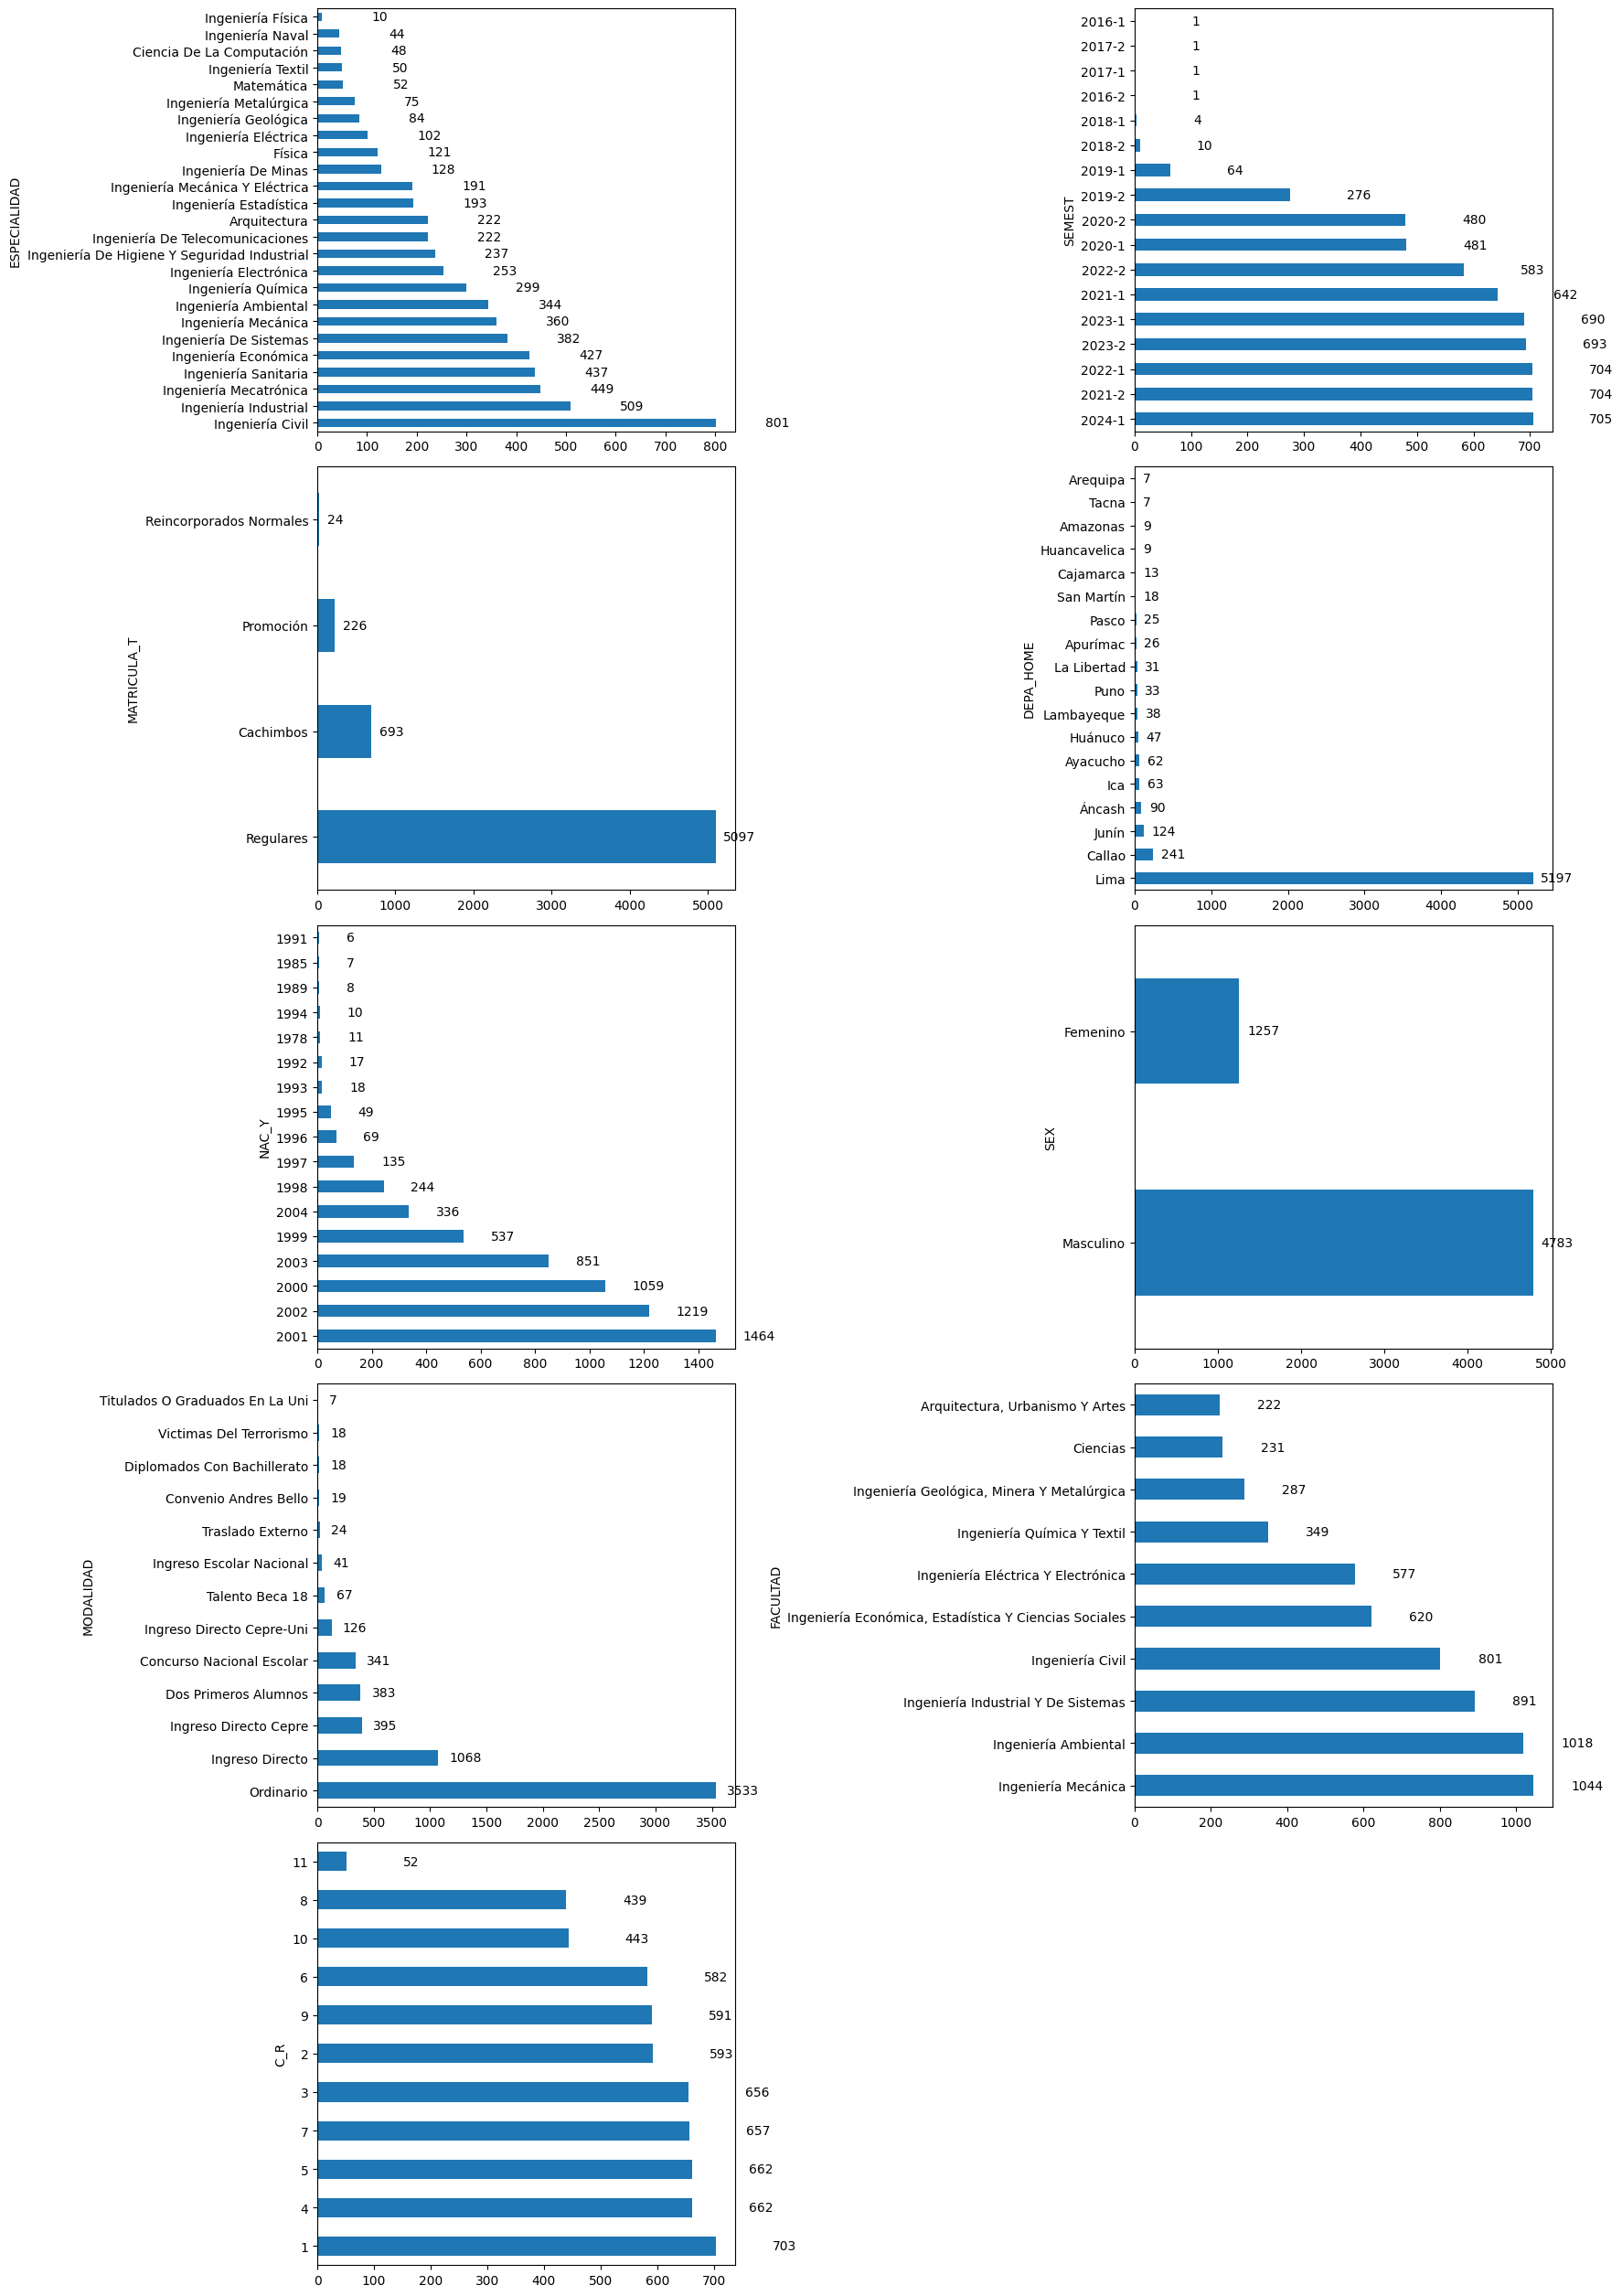

In [ ]:
fig = plt.figure(figsize=(18, 30))
gs = gridspec.GridSpec(ncols=2, nrows=6, figure=fig)

r = c = 0

for col in df_alumnosUNI.columns[1:]: # from columns[1] to columns[12]
  if c == 2:
    c = 0
    r += 1

  ax = fig.add_subplot(gs[r,c])
  df_alumnosUNI[col].value_counts().plot(kind='barh', ax=ax)
  barplots_ylabels(ax, 100, 10)
  c += 1

fig.tight_layout()
plt.show()

Gran parte de las correcciones a aplicar aquí son las mismas que las vistas en el análisis, así que hagámoslas de frente.

## Corregir MODALIDAD

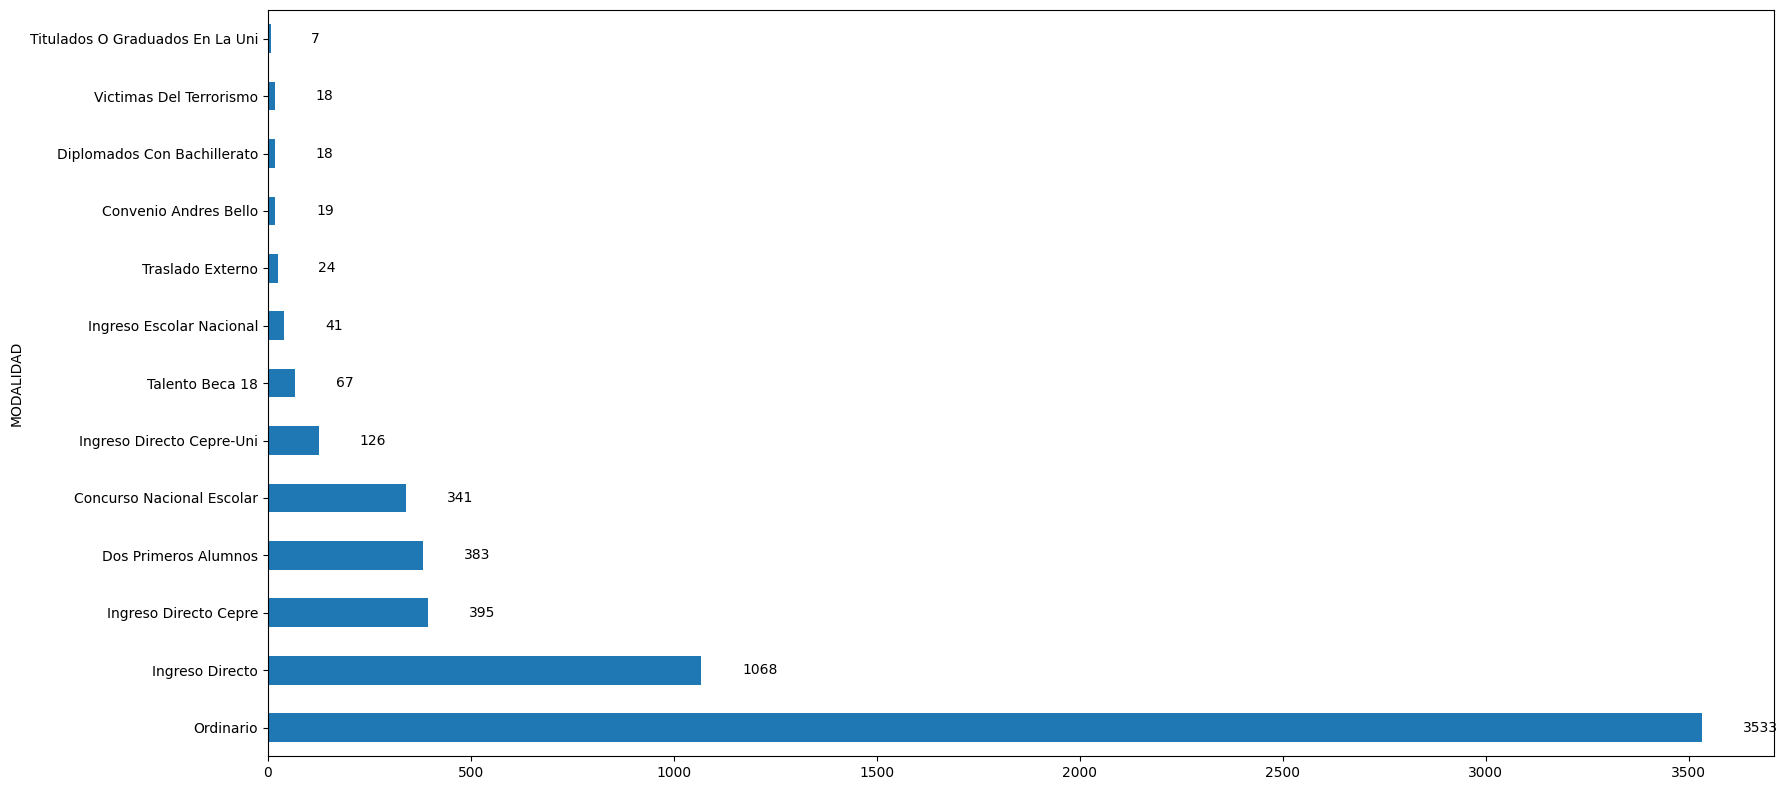

In [ ]:
fig = plt.figure(figsize=(18, 8))
ax = fig.add_subplot()
nombre = 'MODALIDAD'
df_alumnosUNI[nombre].value_counts().plot(kind='barh', ax=ax)
barplots_ylabels(ax, 100, 10)
fig.tight_layout()
plt.show()

Si se fijan bien, hay varias categorías que se repiten entre sí. La primera que se puede ver a simple vista es:
- VICTIMAS DEL TERRORISMO, VÍCTIMAS DEL TERRORISMO, VICTIMA DEL TERRORISMO.

Reemplazemos los nombres por un único nombre: VÍCTIMAS DEL TERRORISMO.

In [ ]:
df_alumnosUNI.MODALIDAD.unique()

array(['Ordinario', 'Ingreso Directo Cepre', 'Ingreso Directo',
       'Ingreso Escolar Nacional', 'Dos Primeros Alumnos',
       'Convenio Andres Bello', 'Talento Beca 18',
       'Diplomados Con Bachillerato', 'Concurso Nacional Escolar',
       'Victimas Del Terrorismo', 'Titulados O Graduados En La Uni',
       'Ingreso Directo Cepre-Uni', 'Traslado Externo'], dtype=object)

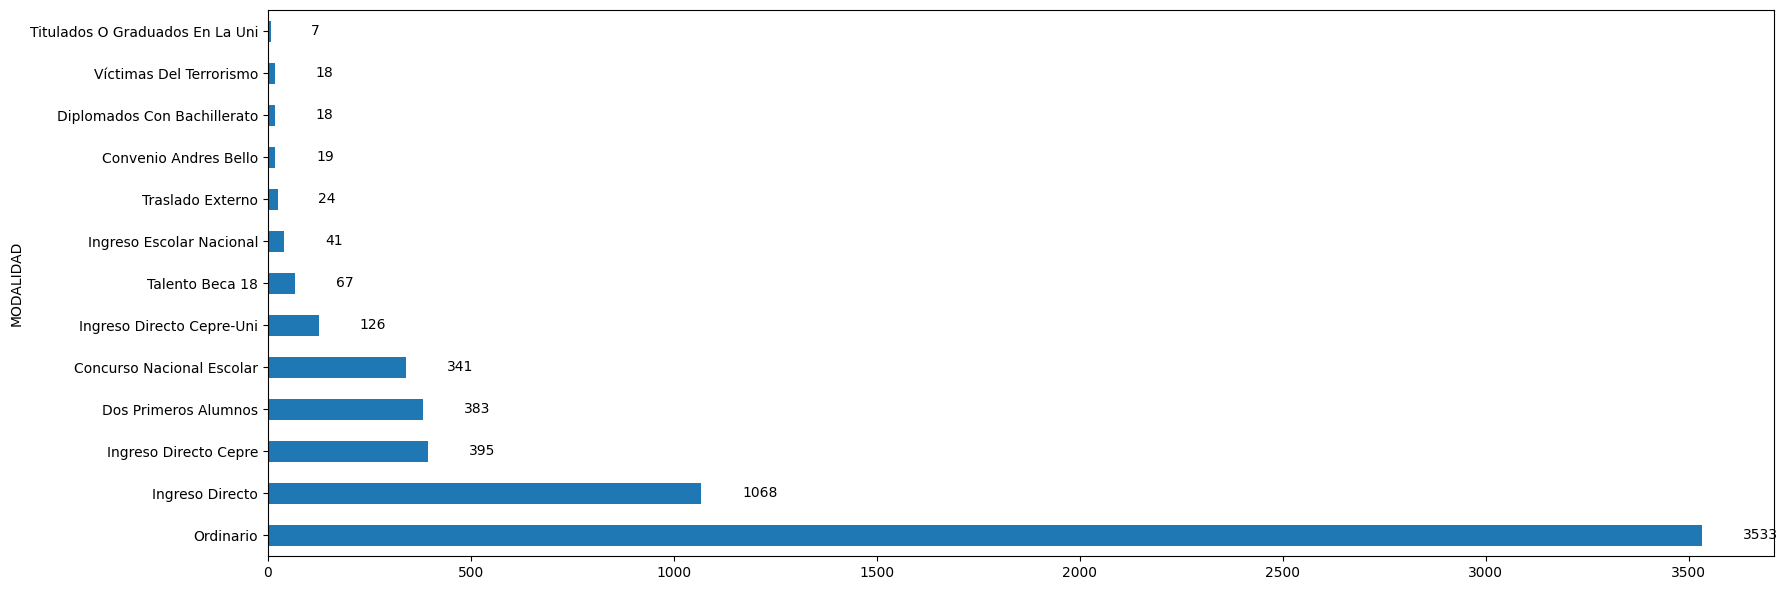

In [ ]:
df_alumnosUNI.loc[(df_alumnosUNI.MODALIDAD=='Victimas Del Terrorismo') | (df_alumnosUNI.MODALIDAD=='Victima Del Terrorismo'), 'MODALIDAD'] = 'Víctimas Del Terrorismo'
fig = plt.figure(figsize=(18, 6))
ax = fig.add_subplot()
df_alumnosUNI[nombre].value_counts().plot(kind='barh', ax=ax)
barplots_ylabels(ax, 100, 10)
fig.tight_layout()
plt.show()

Ahora, el segundo que se ve a simple vista es:
- INGRESO DIRECTO CEPRE-UNI INTENSIVO, INGRESO DIRECTO CEPRE-UNI O CEPRE-UNI INTENSIVO, INGRESO DIRECTO CEPRE-UNI, INGRESO DIRECTO CEPRE, INGRESO DIRECTO.

Reemplazemos estos a continuación, por INGRESO DIRECTO.

In [ ]:
df_alumnosUNI.MODALIDAD.unique()

array(['Ordinario', 'Ingreso Directo Cepre', 'Ingreso Directo',
       'Ingreso Escolar Nacional', 'Dos Primeros Alumnos',
       'Convenio Andres Bello', 'Talento Beca 18',
       'Diplomados Con Bachillerato', 'Concurso Nacional Escolar',
       'Víctimas Del Terrorismo', 'Titulados O Graduados En La Uni',
       'Ingreso Directo Cepre-Uni', 'Traslado Externo'], dtype=object)

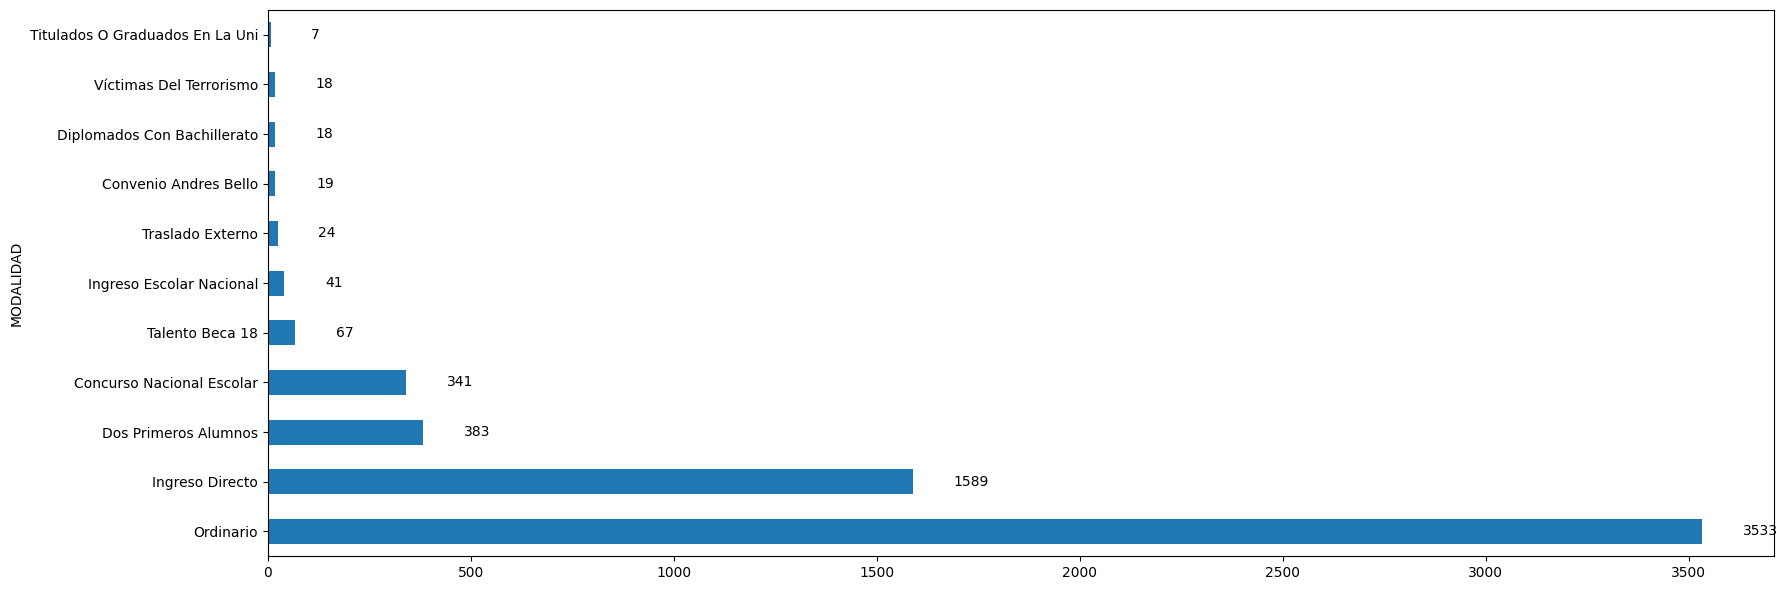

In [ ]:
df_alumnosUNI.loc[(df_alumnosUNI.MODALIDAD=='Ingreso Directo Cepre-Uni') | (df_alumnosUNI.MODALIDAD=='Ingreso Directo Cepre-Uni O Cepre-Uni Intensivo') |
                  (df_alumnosUNI.MODALIDAD=='Ingreso Directo Cepre') | (df_alumnosUNI.MODALIDAD=='Ingreso Directo Cepre-Uni Intensivo'), 'MODALIDAD'] = 'Ingreso Directo'
fig = plt.figure(figsize=(18, 6))
ax = fig.add_subplot()
df_alumnosUNI[nombre].value_counts().plot(kind='barh', ax=ax)
barplots_ylabels(ax, 100, 10)
fig.tight_layout()
plt.show()

Ahora, el tercero que se ve a simple vista es:
- TITULADOS O GRADUADOS UNI, TITULADOS O GRADUADOS, TITULADOS O GRADUADOS EN OTRA UNIVERSIDAD, TITULADOS O GRADUADOS EN LA UNI.

Reemplazamos por TITULADOS O GRADUADOS.

In [ ]:
df_alumnosUNI.MODALIDAD.unique()

array(['Ordinario', 'Ingreso Directo', 'Ingreso Escolar Nacional',
       'Dos Primeros Alumnos', 'Convenio Andres Bello', 'Talento Beca 18',
       'Diplomados Con Bachillerato', 'Concurso Nacional Escolar',
       'Víctimas Del Terrorismo', 'Titulados O Graduados En La Uni',
       'Traslado Externo'], dtype=object)

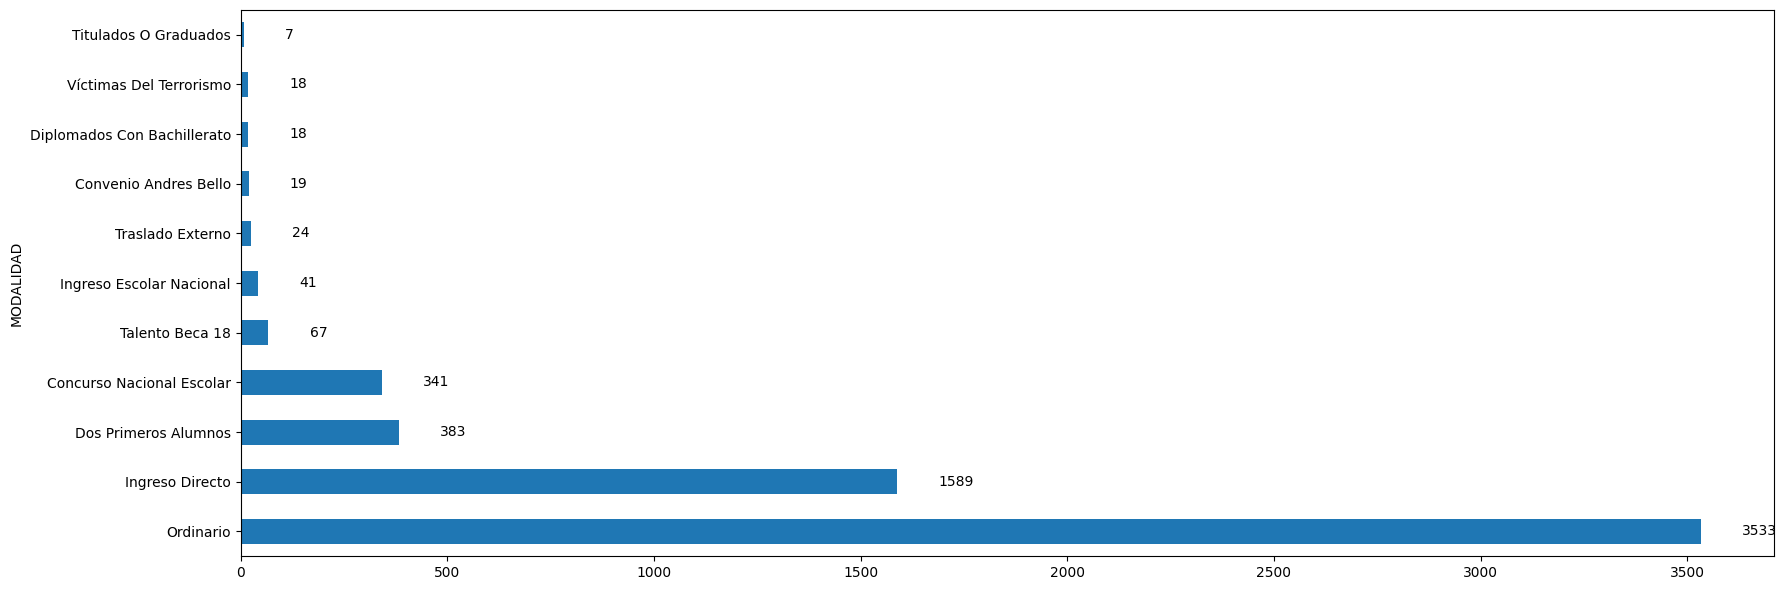

In [ ]:
df_alumnosUNI.loc[(df_alumnosUNI.MODALIDAD=='Titulados O Graduados En La Uni') | (df_alumnosUNI.MODALIDAD=='Titulados O Graduados En Otra Universidad') |
                  (df_alumnosUNI.MODALIDAD=='Titulados O Graduados Uni'), 'MODALIDAD'] = 'Titulados O Graduados'
fig = plt.figure(figsize=(18, 6))
ax = fig.add_subplot()
df_alumnosUNI[nombre].value_counts().plot(kind='barh', ax=ax)
barplots_ylabels(ax, 100, 10)
fig.tight_layout()
plt.show()

Ahora, el cuarto que se puede ver es:
- CONCURSO NACIONAL ESCOLAR - LIMA Y CALLAO, CONCURSO NACIONAL ESCOLAR - PROVINCIAS, CONCURSO NACIONAL ESCOLAR (OR+LP), CONCURSO NACIONAL ESCOLAR (LM+C), CONCURSO NACIONAL ESCOLAR.

Reemplazamos los nombres por CONCURSO NACIONAL ESCOLAR.

In [ ]:
df_alumnosUNI.MODALIDAD.unique()

array(['Ordinario', 'Ingreso Directo', 'Ingreso Escolar Nacional',
       'Dos Primeros Alumnos', 'Convenio Andres Bello', 'Talento Beca 18',
       'Diplomados Con Bachillerato', 'Concurso Nacional Escolar',
       'Víctimas Del Terrorismo', 'Titulados O Graduados',
       'Traslado Externo'], dtype=object)

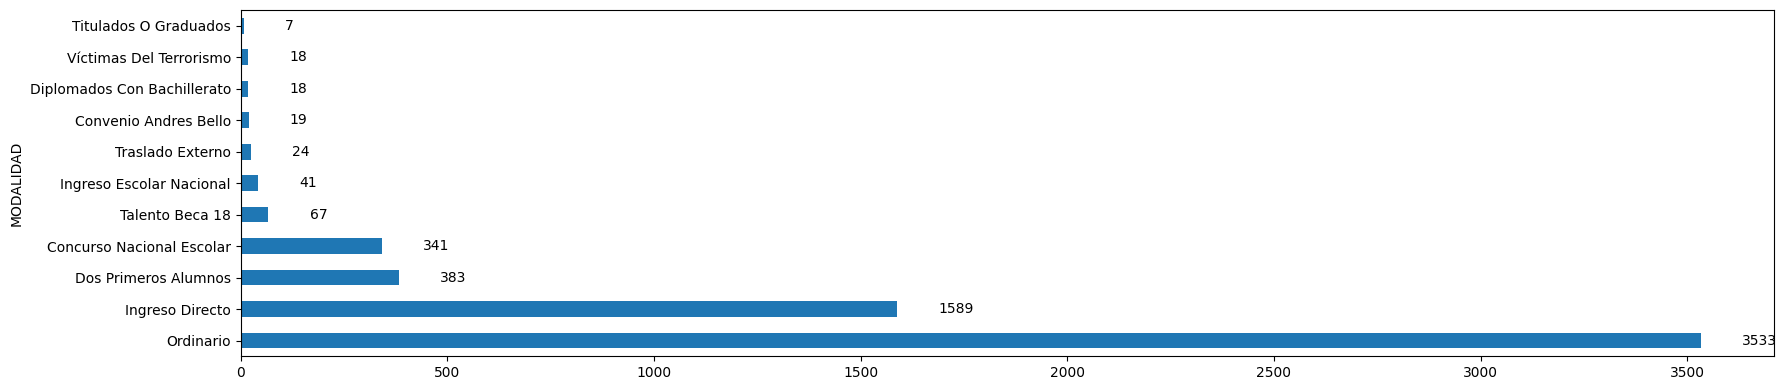

In [ ]:
df_alumnosUNI.loc[(df_alumnosUNI.MODALIDAD=='Concurso Nacional Escolar (Or+Lp)') | (df_alumnosUNI.MODALIDAD=='Concurso Nacional Escolar - Provincias') |
                  (df_alumnosUNI.MODALIDAD=='Concurso Nacional Escolar - Lima Y Callao') |
                  (df_alumnosUNI.MODALIDAD=='Concurso Nacional Escolar (Lm+C)'), 'MODALIDAD'] = 'Concurso Nacional Escolar'
fig = plt.figure(figsize=(18, 4))
ax = fig.add_subplot()
df_alumnosUNI[nombre].value_counts().plot(kind='barh', ax=ax)
barplots_ylabels(ax, 100, 10)
fig.tight_layout()
plt.show()

Ahora, el cuarto y quinto que se puede ver es:
- CONVENIO DIPLOMÁTICO E HIJO CON CÓNYUGE DE DIPLOMÁTICO, CONVENIO ANDRES BELLO.
- DIPLOMADO CON BACHILLERATO INTERNACIONAL, DIPLOMADO CON BACHILLERATO.

1. Ya que el Convenio Andres Bello es un Convenio Diplomático, reemplazaremos este nombre por el otro.
2. Remplazamos el primer nombre de Diplomado por DIPLOMADO CON BACHILLERATO.


In [ ]:
df_alumnosUNI.MODALIDAD.unique()

array(['Ordinario', 'Ingreso Directo', 'Ingreso Escolar Nacional',
       'Dos Primeros Alumnos', 'Convenio Andres Bello', 'Talento Beca 18',
       'Diplomados Con Bachillerato', 'Concurso Nacional Escolar',
       'Víctimas Del Terrorismo', 'Titulados O Graduados',
       'Traslado Externo'], dtype=object)

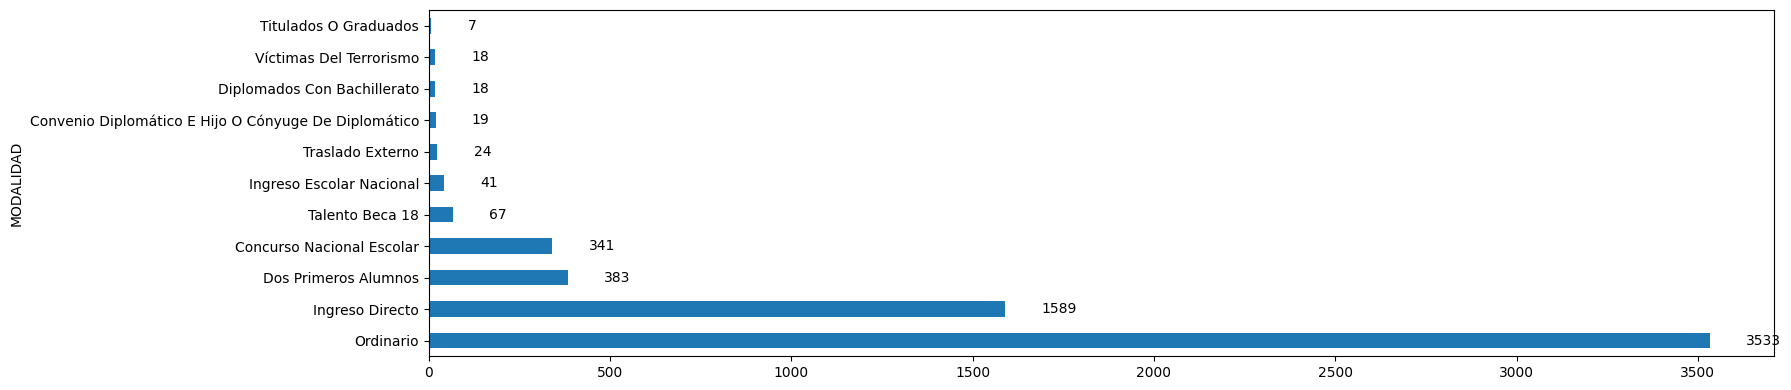

In [ ]:
df_alumnosUNI.loc[df_alumnosUNI.MODALIDAD=='Convenio Andres Bello', 'MODALIDAD'] = 'Convenio Diplomático E Hijo O Cónyuge De Diplomático'
df_alumnosUNI.loc[df_alumnosUNI.MODALIDAD=='Diplomado Con Bachillerato Internacional', 'MODALIDAD'] = 'Diplomados Con Bachillerato'
fig = plt.figure(figsize=(18, 4))
ax = fig.add_subplot()
df_alumnosUNI[nombre].value_counts().plot(kind='barh', ax=ax)
barplots_ylabels(ax, 100, 10)
fig.tight_layout()
plt.show()

## Corregir MATRICULA_T

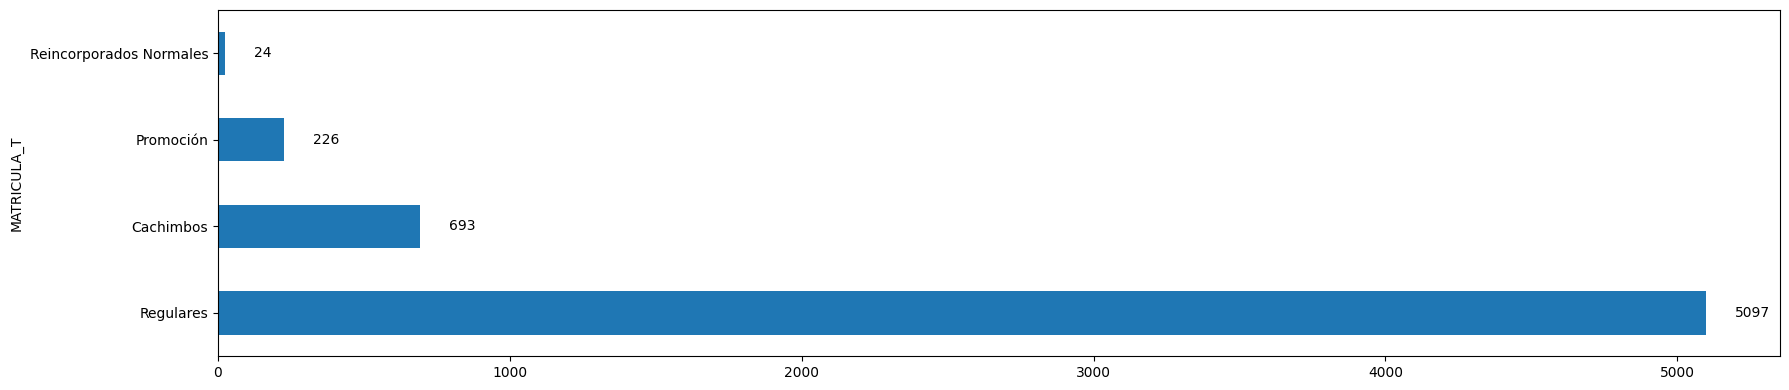

In [ ]:
fig = plt.figure(figsize=(18, 4))
ax = fig.add_subplot()
nombre = 'MATRICULA_T'
df_alumnosUNI[nombre].value_counts().plot(kind='barh', ax=ax)
barplots_ylabels(ax, 100, 10)
fig.tight_layout()
plt.show()

El primero es:
- Promocion, Promoción.

Reemplazemos por Promoción.

In [ ]:
df_alumnosUNI.MATRICULA_T.unique()

array(['Regulares', 'Reincorporados Normales', 'Promoción', 'Cachimbos'],
      dtype=object)

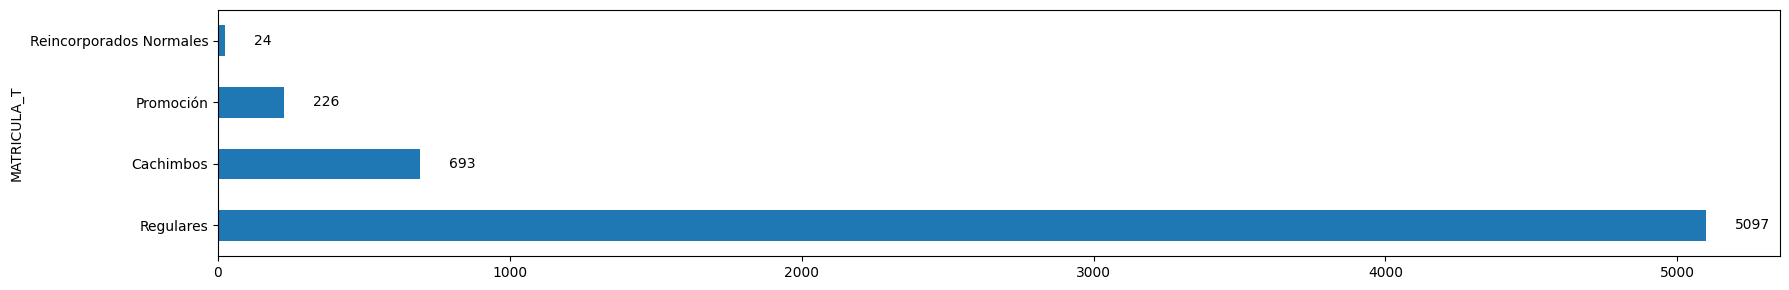

In [ ]:
df_alumnosUNI.loc[df_alumnosUNI.MATRICULA_T=='Promocion', 'MATRICULA_T'] = 'Promoción'
fig = plt.figure(figsize=(18, 3))
ax = fig.add_subplot()
df_alumnosUNI[nombre].value_counts().plot(kind='barh', ax=ax)
barplots_ylabels(ax, 100, 10)
fig.tight_layout()
plt.show()

Por mientras, juntemos los nombres de los reincorporados.

In [ ]:
df_alumnosUNI.MATRICULA_T.unique()

array(['Regulares', 'Reincorporados Normales', 'Promoción', 'Cachimbos'],
      dtype=object)

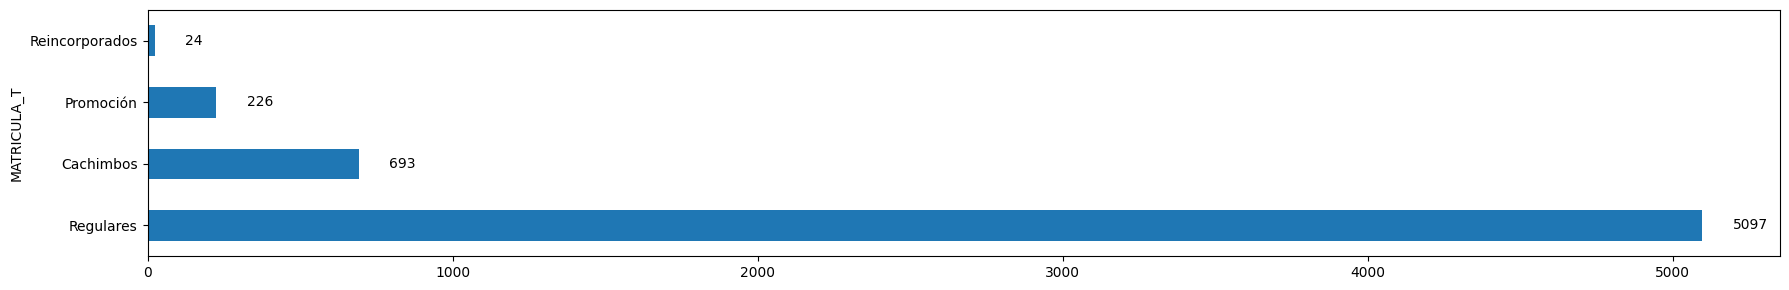

In [ ]:
df_alumnosUNI.loc[(df_alumnosUNI.MATRICULA_T=='Reincorporados Normales') | (df_alumnosUNI.MATRICULA_T=='Reincorporados Trikas') |
                  (df_alumnosUNI.MATRICULA_T=='Reincorporados Riesgo Academico'), 'MATRICULA_T'] = 'Reincorporados'
fig = plt.figure(figsize=(18, 3))
ax = fig.add_subplot()
df_alumnosUNI[nombre].value_counts().plot(kind='barh', ax=ax)
barplots_ylabels(ax, 100, 10)
fig.tight_layout()
plt.show()

Y ya que el único Trika se considera un alumno bajo Riesgo Académico, reemplazamos ambos valores (ya que el que está allí no tiene tilde) por el correcto.

In [ ]:
df_alumnosUNI.MATRICULA_T.unique()

array(['Regulares', 'Reincorporados', 'Promoción', 'Cachimbos'],
      dtype=object)

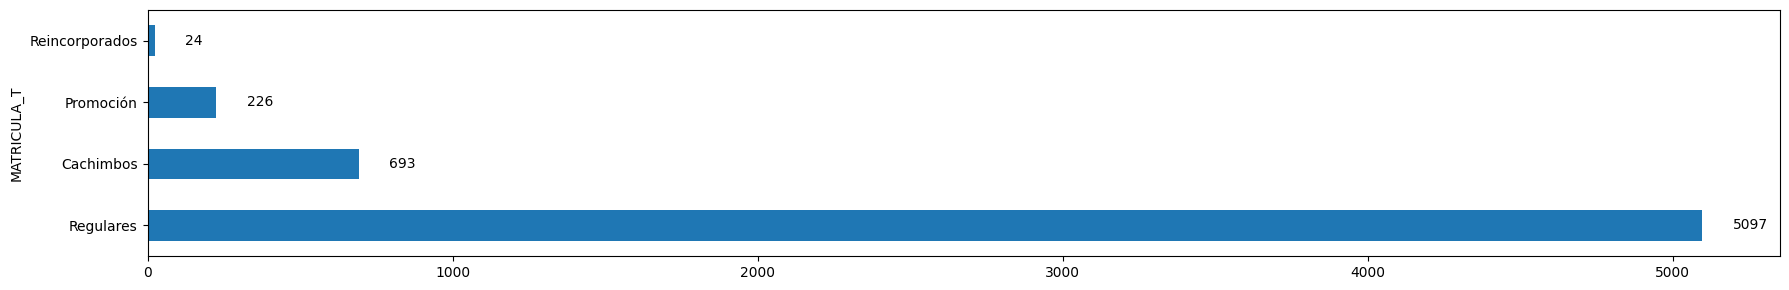

In [ ]:
df_alumnosUNI.loc[(df_alumnosUNI.MATRICULA_T=='Alumno Trika') | (df_alumnosUNI.MATRICULA_T=='Riesgo Academico'), 'MATRICULA_T'] = 'Riesgo Académico'
fig = plt.figure(figsize=(18, 3))
ax = fig.add_subplot()
df_alumnosUNI[nombre].value_counts().plot(kind='barh', ax=ax)
barplots_ylabels(ax, 100, 10)
fig.tight_layout()
plt.show()

## Modificar Sexo de los estudiantes

En realidad, vamos a sólo dejar las primeras letras de la columna SEXO

In [ ]:
df_alumnosUNI.SEX = df_alumnosUNI.SEX.str[0]
df_alumnosUNI.SEX.unique()

array(['F', 'M'], dtype=object)

# Añadir información al dataset arreglado

## Dataset extra 1 (en Python): dfTemp (completo esta vez)

Ya tenemos este dataframe temporal casi listo. Sólo faltaría hacerle unos arreglos extra. Para ello, revisemos cuáles son las columnas cuyos datos varían fila por fila, y cuáles no.

In [ ]:
print('N° SÓLO ID : ' + str(len(df_alumnosUNI['ID'].drop_duplicates())))

for columna in df_alumnosUNI.columns[1:]:
  print('N° ID y ' + columna + ': ' + str(len(df_alumnosUNI[['ID', columna]].drop_duplicates())))

N° SÓLO ID : 705
N° ID y ESPECIALIDAD: 705
N° ID y SEMEST: 6040
N° ID y MATRICULA_T: 1627
N° ID y DEPA_HOME: 705
N° ID y NAC_Y: 705
N° ID y SEX: 705
N° ID y MODALIDAD: 705
N° ID y FACULTAD: 705
N° ID y C_R: 5254


De aquí podemos entender lo siguiente:
- Sólo hay 705 estudiantes matriculados al menos desde el 2024-1, con un rendimiento académico de por lo menos un 100% y que han llevado al menos 6 semestres en la universidad.
- En todo este tiempo como estudiantes, todos han tenido SÓLO un departamento como domicilio, una especialidad y una facultad.
- Datos como el sexo, modalidad de ingreso, y el año de nacimiento permanecen únicos como era de esperarse.

Utilizando esta muestra de datos, copiamos los de las columnas deseadas al dataframe extra.

In [ ]:
dfID['SEX'] = df_alumnosUNI[['ID', 'SEX']].drop_duplicates().reset_index().SEX
dfID['FACULTAD'] = df_alumnosUNI[['ID', 'FACULTAD']].drop_duplicates().reset_index().FACULTAD
dfID['MODALIDAD'] = df_alumnosUNI[['ID', 'MODALIDAD']].drop_duplicates().reset_index().MODALIDAD
dfID['NAC_Y'] = df_alumnosUNI[['ID', 'NAC_Y']].drop_duplicates().reset_index().NAC_Y
dfID['DEPA_HOME'] = df_alumnosUNI[['ID', 'DEPA_HOME']].drop_duplicates().reset_index().DEPA_HOME
dfID = dfID[['IDHASH', 'ID', 'SEX', 'NAC_Y', 'DEPA_HOME', 'MODALIDAD','FACULTAD', 'ESPECIALIDAD', 'R_A', 'T_M', 'F_SEM', 'L_SEM']]
dfID.head()

,IDHASH,ID,SEX,NAC_Y,DEPA_HOME,MODALIDAD,FACULTAD,ESPECIALIDAD,R_A,T_M,F_SEM,L_SEM
0,DE98198DC390555516624E85FFEA70808534C42632F3A2...,8641,F,1978,Lima,Ordinario,"Ingeniería Económica, Estadística Y Ciencias S...",Ingeniería Económica,1.000,11,2016-1,2024-1
1,B9EA713999F2A0A91E2880895CDA8FB488E9D4502FCBCC...,14313,M,1998,Lima,Ordinario,"Ingeniería Geológica, Minera Y Metalúrgica",Ingeniería De Minas,1.000,11,2017-2,2024-1
2,A6A1544AAAD9A73DDD7BF1BD59C53C268FAFB88C669E4C...,15483,M,2000,Lima,Ordinario,Ingeniería Química Y Textil,Ingeniería Química,1.000,11,2018-1,2024-1
3,CC7F4D3155F84AABC65A621E93993B27F0B01A9303C24E...,15690,M,1999,Junín,Ordinario,Ciencias,Ciencia De La Computación,1.000,10,2018-1,2024-1
4,F66ADF7C8360B7C5FA2D42F012BCFEED49F066BB3A2F51...,15899,M,1989,Lima,Ingreso Directo,"Ingeniería Económica, Estadística Y Ciencias S...",Ingeniería Estadística,1.375,8,2018-1,2024-1


Y eliminamos las columnas de nuestro dataframe principal

In [ ]:
df_alumnosUNI.drop(columns=['SEX', 'MODALIDAD', 'NAC_Y', 'DEPA_HOME', 'ESPECIALIDAD', 'FACULTAD'], inplace=True)
df_alumnosUNI.head()

,ID,SEMEST,MATRICULA_T,C_R
0,8641,2016-1,Regulares,8
1,8641,2016-2,Regulares,8
2,8641,2017-1,Regulares,8
3,8641,2019-1,Regulares,8
4,8641,2019-2,Regulares,8


Ahora, continuamos con el filtro de los últimos requisitos para ser mostrado en la lista de estudiantes con potencial:

- Haber faltado matricularse máximo 1 semestre.
- En caso de tener un R. A. mayor al 100%, evitar saltos de ciclos irreales.

Empezemos con el primero. Para este, usaremos el dataframe temporal, y guardaremos todos los semestres sin repetirlos.

In [ ]:
dfTemp = df_alumnosUNI[['SEMEST']].drop_duplicates().sort_values('SEMEST').reset_index(drop=True)
dfTemp['S_ID'] = dfTemp.index + 1
dfTemp = dfTemp[['SEMEST', 'SEMEST', 'S_ID']]
dfTemp.columns = ['F_SEM', 'L_SEM', 'S_ID']
dfTemp.head()

,F_SEM,L_SEM,S_ID
0,2016-1,2016-1,1
1,2016-2,2016-2,2
2,2017-1,2017-1,3
3,2017-2,2017-2,4
4,2018-1,2018-1,5


Los nombres de estas columnas nos serán de utilidad aquí:

Creamos un segundo dataframe temporal. En éste, por cada ID, obtenemos el primer y último semestre en el que se ha matriculado el estudiante.

In [ ]:
dfTemp2 = dfID[:]
dfTemp2.head()

,IDHASH,ID,SEX,NAC_Y,DEPA_HOME,MODALIDAD,FACULTAD,ESPECIALIDAD,R_A,T_M,F_SEM,L_SEM
0,DE98198DC390555516624E85FFEA70808534C42632F3A2...,8641,F,1978,Lima,Ordinario,"Ingeniería Económica, Estadística Y Ciencias S...",Ingeniería Económica,1.000,11,2016-1,2024-1
1,B9EA713999F2A0A91E2880895CDA8FB488E9D4502FCBCC...,14313,M,1998,Lima,Ordinario,"Ingeniería Geológica, Minera Y Metalúrgica",Ingeniería De Minas,1.000,11,2017-2,2024-1
2,A6A1544AAAD9A73DDD7BF1BD59C53C268FAFB88C669E4C...,15483,M,2000,Lima,Ordinario,Ingeniería Química Y Textil,Ingeniería Química,1.000,11,2018-1,2024-1
3,CC7F4D3155F84AABC65A621E93993B27F0B01A9303C24E...,15690,M,1999,Junín,Ordinario,Ciencias,Ciencia De La Computación,1.000,10,2018-1,2024-1
4,F66ADF7C8360B7C5FA2D42F012BCFEED49F066BB3A2F51...,15899,M,1989,Lima,Ingreso Directo,"Ingeniería Económica, Estadística Y Ciencias S...",Ingeniería Estadística,1.375,8,2018-1,2024-1


Ahora, reemplazamos las columnas F_S y L_S por el ID de cada semestre.

In [ ]:
dfTemp2 = pd.merge(dfID[['ID', 'F_SEM', 'L_SEM']], dfTemp[['F_SEM', 'S_ID']], how='inner')
dfTemp2.columns = ['ID', 'F_SEM', 'L_SEM', 'FS_ID']
dfTemp2 = pd.merge(dfTemp2, dfTemp[['L_SEM', 'S_ID']], how='inner')
dfTemp2.columns = ['ID', 'F_SEM', 'L_SEM', 'FS_ID', 'LS_ID']
dfTemp2 = dfTemp2[['ID', 'FS_ID', 'LS_ID']]
dfTemp2.head()

,ID,FS_ID,LS_ID
0,8641,1,17
1,14313,4,17
2,15483,5,17
3,15690,5,17
4,15899,5,17


Y ahora, obtenemos el número de semestres entre la primer y última matrícula de esta manera:

Restamos LS_ID con FS_ID, y al resultado le sumamos 1.

In [ ]:
dfTemp2['N_SEM'] = dfTemp2.LS_ID - dfTemp2.FS_ID + 1
dfTemp2 = dfTemp2[['ID', 'N_SEM']]
dfTemp2.head()

,ID,N_SEM
0,8641,17
1,14313,14
2,15483,13
3,15690,13
4,15899,13


Combinamos este dataframe temporal con dfID.

In [ ]:
dfID = pd.merge(dfID, dfTemp2, how='inner').drop(columns=['F_SEM', 'L_SEM'])
dfID.head()

,IDHASH,ID,SEX,NAC_Y,DEPA_HOME,MODALIDAD,FACULTAD,ESPECIALIDAD,R_A,T_M,N_SEM
0,DE98198DC390555516624E85FFEA70808534C42632F3A2...,8641,F,1978,Lima,Ordinario,"Ingeniería Económica, Estadística Y Ciencias S...",Ingeniería Económica,1.000,11,17
1,B9EA713999F2A0A91E2880895CDA8FB488E9D4502FCBCC...,14313,M,1998,Lima,Ordinario,"Ingeniería Geológica, Minera Y Metalúrgica",Ingeniería De Minas,1.000,11,14
2,A6A1544AAAD9A73DDD7BF1BD59C53C268FAFB88C669E4C...,15483,M,2000,Lima,Ordinario,Ingeniería Química Y Textil,Ingeniería Química,1.000,11,13
3,CC7F4D3155F84AABC65A621E93993B27F0B01A9303C24E...,15690,M,1999,Junín,Ordinario,Ciencias,Ciencia De La Computación,1.000,10,13
4,F66ADF7C8360B7C5FA2D42F012BCFEED49F066BB3A2F51...,15899,M,1989,Lima,Ingreso Directo,"Ingeniería Económica, Estadística Y Ciencias S...",Ingeniería Estadística,1.375,8,13


Ahora, para hallar el número de semestres que faltó el estudiante, es muy sencillo. Sólo hay que restar N_SEM con T_M.

In [ ]:
dfID['OUT_SEM'] = dfID.N_SEM - dfID.T_M
dfID.head()

,IDHASH,ID,SEX,NAC_Y,DEPA_HOME,MODALIDAD,FACULTAD,ESPECIALIDAD,R_A,T_M,N_SEM,OUT_SEM
0,DE98198DC390555516624E85FFEA70808534C42632F3A2...,8641,F,1978,Lima,Ordinario,"Ingeniería Económica, Estadística Y Ciencias S...",Ingeniería Económica,1.000,11,17,6
1,B9EA713999F2A0A91E2880895CDA8FB488E9D4502FCBCC...,14313,M,1998,Lima,Ordinario,"Ingeniería Geológica, Minera Y Metalúrgica",Ingeniería De Minas,1.000,11,14,3
2,A6A1544AAAD9A73DDD7BF1BD59C53C268FAFB88C669E4C...,15483,M,2000,Lima,Ordinario,Ingeniería Química Y Textil,Ingeniería Química,1.000,11,13,2
3,CC7F4D3155F84AABC65A621E93993B27F0B01A9303C24E...,15690,M,1999,Junín,Ordinario,Ciencias,Ciencia De La Computación,1.000,10,13,3
4,F66ADF7C8360B7C5FA2D42F012BCFEED49F066BB3A2F51...,15899,M,1989,Lima,Ingreso Directo,"Ingeniería Económica, Estadística Y Ciencias S...",Ingeniería Estadística,1.375,8,13,5


A simple vista, no parece haber ninguno, pero si utilizamos el método adecuado...

In [ ]:
dfID.OUT_SEM.value_counts()

,count
OUT_SEM,
0,556
1,136
2,8
3,2
6,1
5,1
4,1


Veremos que hay estudiantes que, a pesar de tener varias matrículas, no se han matriculado más de 1 semestre. Ya que estos no cumplen con la norma, los retiraremos del dataframe principal y del extra.

In [ ]:
dfID = dfID[dfID.OUT_SEM <= 1].reset_index(drop=True)
dfID

,IDHASH,ID,SEX,NAC_Y,DEPA_HOME,MODALIDAD,FACULTAD,ESPECIALIDAD,R_A,T_M,N_SEM,OUT_SEM
0,84ADC4307A4D4691BC64055B2F49664BF55147F5F4DFBB...,16367,M,1999,Lima,Ordinario,Ingeniería Eléctrica Y Electrónica,Ingeniería De Telecomunicaciones,1.0,11,12,1
1,89A7E825C6658EABF69251943F9719A0AC64C269AE31EF...,16389,F,1997,Lima,Ordinario,Ingeniería Ambiental,Ingeniería Sanitaria,1.0,11,12,1
2,AB758207E15EA09E36AC8C834EE569448E267F2142A802...,16491,M,1997,Lima,Ordinario,Ingeniería Ambiental,Ingeniería Sanitaria,1.0,11,12,1
3,0971FA5E4942300EFD6AA31BD385C947C47C09329C60EA...,16783,M,2002,Puno,Ingreso Escolar Nacional,Ingeniería Ambiental,Ingeniería Ambiental,1.0,10,11,1
4,16E2D717D308ABC0F122D61F675D445206DFB2D32C593E...,16849,M,1995,Lima,Ingreso Directo,Ingeniería Ambiental,Ingeniería Sanitaria,1.0,10,11,1
...,...,...,...,...,...,...,...,...,...,...,...,...
687,FD2A80F42BA705CCF1A684B094176B364616E038CD0708...,21508,M,2003,Cajamarca,Ingreso Directo,Ingeniería Civil,Ingeniería Civil,1.0,6,6,0
688,FD93518DF7D66461C74ACBA8B3B08E20B90E23DE84741B...,21510,M,1991,Lima,Ordinario,Ingeniería Industrial Y De Sistemas,Ingeniería Industrial,1.0,6,6,0
689,FDF6C45B3D1CBD21361E62EE8878780205C5D67DB2D416...,21511,M,2001,Lima,Ordinario,Ingeniería Civil,Ingeniería Civil,1.0,6,6,0
690,FDF6C9730C175499C9550B8906464EE0428C0F3B31A47A...,21512,M,2004,Ayacucho,Ordinario,Ingeniería Eléctrica Y Electrónica,Ingeniería Electrónica,1.0,6,6,0


Ahora tenemos 692 estudiantes.

In [ ]:
df_alumnosUNI = pd.merge(df_alumnosUNI, dfID[['ID']], how='inner').reset_index(drop=True)
df_alumnosUNI

,ID,SEMEST,MATRICULA_T,C_R
0,16367,2018-2,Cachimbos,1
1,16367,2019-1,Regulares,2
2,16367,2019-2,Regulares,3
3,16367,2020-1,Regulares,3
4,16367,2020-2,Regulares,4
...,...,...,...,...
5915,21513,2022-1,Regulares,2
5916,21513,2022-2,Regulares,4
5917,21513,2023-1,Regulares,4
5918,21513,2023-2,Regulares,5


Y 5920 matrículas.

Por último, vamos a descartar aquellos estudiantes que tengan saltos de ciclo irreales. Estableceremos como umbral 2 (será considerado pasar 3 ciclos o más como irreal e imposible de lograr).

Para ello, obtenemos la diferencia entre el valor actual y el anterior, por cada ID.

In [ ]:
df_alumnosUNI.groupby('ID')[['C_R']].diff()

,C_R
0,NaN
1,1.0
2,1.0
3,0.0
4,1.0
...,...
5915,1.0
5916,2.0
5917,0.0
5918,1.0


Si observamos bien, el valor nulo aparece al inicio de cada lista de ciclos por cada ID. Usemos los dataframes temporales para agregar los saltos entre ciclos por cada estudiante.

In [ ]:
dfTemp = df_alumnosUNI[['ID']]
dfTemp['C_DIFF'] = df_alumnosUNI.groupby('ID')[['C_R']].diff()
dfTemp

<ipython-input-802-a1aa69c2f4c6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfTemp['C_DIFF'] = df_alumnosUNI.groupby('ID')[['C_R']].diff()


,ID,C_DIFF
0,16367,NaN
1,16367,1.0
2,16367,1.0
3,16367,0.0
4,16367,1.0
...,...,...
5915,21513,1.0
5916,21513,2.0
5917,21513,0.0
5918,21513,1.0


Ahora sí, obtengamos el mayor salto hecho por cada estudiante.

In [ ]:
dfTemp2 = dfTemp.groupby('ID')[['C_DIFF']].max().reset_index()
dfTemp2

,ID,C_DIFF
0,16367,2.0
1,16389,2.0
2,16491,2.0
3,16783,2.0
4,16849,2.0
...,...,...
687,21508,1.0
688,21510,2.0
689,21511,2.0
690,21512,1.0


Veamos cuántos estudiantes pasan por encima del umbral de 2.

In [ ]:
dfTemp2.C_DIFF.value_counts()

,count
C_DIFF,
2.0,575
1.0,90
3.0,25
5.0,1
6.0,1


Tenemos 27 estudiantes que rompen la última regla. Por lo tanto, los descartaremos.

In [ ]:
dfTemp = dfTemp2[dfTemp2.C_DIFF <= 2]
dfTemp

,ID,C_DIFF
0,16367,2.0
1,16389,2.0
2,16491,2.0
3,16783,2.0
4,16849,2.0
...,...,...
687,21508,1.0
688,21510,2.0
689,21511,2.0
690,21512,1.0


Y ahora sólo nos quedan 665 estudiantes. Usaremos solamente éstos para el dataframe principal y el extra.

In [ ]:
dfID = pd.merge(dfID, dfTemp[['ID']], how='inner')
dfID

,IDHASH,ID,SEX,NAC_Y,DEPA_HOME,MODALIDAD,FACULTAD,ESPECIALIDAD,R_A,T_M,N_SEM,OUT_SEM
0,84ADC4307A4D4691BC64055B2F49664BF55147F5F4DFBB...,16367,M,1999,Lima,Ordinario,Ingeniería Eléctrica Y Electrónica,Ingeniería De Telecomunicaciones,1.0,11,12,1
1,89A7E825C6658EABF69251943F9719A0AC64C269AE31EF...,16389,F,1997,Lima,Ordinario,Ingeniería Ambiental,Ingeniería Sanitaria,1.0,11,12,1
2,AB758207E15EA09E36AC8C834EE569448E267F2142A802...,16491,M,1997,Lima,Ordinario,Ingeniería Ambiental,Ingeniería Sanitaria,1.0,11,12,1
3,0971FA5E4942300EFD6AA31BD385C947C47C09329C60EA...,16783,M,2002,Puno,Ingreso Escolar Nacional,Ingeniería Ambiental,Ingeniería Ambiental,1.0,10,11,1
4,16E2D717D308ABC0F122D61F675D445206DFB2D32C593E...,16849,M,1995,Lima,Ingreso Directo,Ingeniería Ambiental,Ingeniería Sanitaria,1.0,10,11,1
...,...,...,...,...,...,...,...,...,...,...,...,...
660,FD2A80F42BA705CCF1A684B094176B364616E038CD0708...,21508,M,2003,Cajamarca,Ingreso Directo,Ingeniería Civil,Ingeniería Civil,1.0,6,6,0
661,FD93518DF7D66461C74ACBA8B3B08E20B90E23DE84741B...,21510,M,1991,Lima,Ordinario,Ingeniería Industrial Y De Sistemas,Ingeniería Industrial,1.0,6,6,0
662,FDF6C45B3D1CBD21361E62EE8878780205C5D67DB2D416...,21511,M,2001,Lima,Ordinario,Ingeniería Civil,Ingeniería Civil,1.0,6,6,0
663,FDF6C9730C175499C9550B8906464EE0428C0F3B31A47A...,21512,M,2004,Ayacucho,Ordinario,Ingeniería Eléctrica Y Electrónica,Ingeniería Electrónica,1.0,6,6,0


In [ ]:
df_alumnosUNI = pd.merge(df_alumnosUNI, dfTemp[['ID']], how='inner')
df_alumnosUNI

,ID,SEMEST,MATRICULA_T,C_R
0,16367,2018-2,Cachimbos,1
1,16367,2019-1,Regulares,2
2,16367,2019-2,Regulares,3
3,16367,2020-1,Regulares,3
4,16367,2020-2,Regulares,4
...,...,...,...,...
5685,21513,2022-1,Regulares,2
5686,21513,2022-2,Regulares,4
5687,21513,2023-1,Regulares,4
5688,21513,2023-2,Regulares,5


Finalmente, eliminamos las columnas que no queremos usar de dfID

In [ ]:
dfID = dfID[['IDHASH', 'ID', 'R_A', 'FACULTAD', 'ESPECIALIDAD', 'SEX', 'MODALIDAD', 'NAC_Y', 'DEPA_HOME']]
dfID.head()

,IDHASH,ID,R_A,FACULTAD,ESPECIALIDAD,SEX,MODALIDAD,NAC_Y,DEPA_HOME
0,84ADC4307A4D4691BC64055B2F49664BF55147F5F4DFBB...,16367,1.0,Ingeniería Eléctrica Y Electrónica,Ingeniería De Telecomunicaciones,M,Ordinario,1999,Lima
1,89A7E825C6658EABF69251943F9719A0AC64C269AE31EF...,16389,1.0,Ingeniería Ambiental,Ingeniería Sanitaria,F,Ordinario,1997,Lima
2,AB758207E15EA09E36AC8C834EE569448E267F2142A802...,16491,1.0,Ingeniería Ambiental,Ingeniería Sanitaria,M,Ordinario,1997,Lima
3,0971FA5E4942300EFD6AA31BD385C947C47C09329C60EA...,16783,1.0,Ingeniería Ambiental,Ingeniería Ambiental,M,Ingreso Escolar Nacional,2002,Puno
4,16E2D717D308ABC0F122D61F675D445206DFB2D32C593E...,16849,1.0,Ingeniería Ambiental,Ingeniería Sanitaria,M,Ingreso Directo,1995,Lima


## Dataset extra 2 (en Power BI): dfTP

Primero, revisemos cuántos departamentos tenemos ahora:

In [ ]:
for depa in dfID.DEPA_HOME.unique():
  print(depa)

print("N° departamentos", len(dfID.DEPA_HOME.unique()))

Lima
Puno
Ayacucho
Callao
Huánuco
Ica
Junín
Áncash
Lambayeque
Pasco
La Libertad
Amazonas
Apurímac
Tacna
Cajamarca
Arequipa
San Martín
N° departamentos 17


Pasamos de 24 a 19 departamentos.

Al igual que como hicimos en el análisis, creamos un dataframe extra más, para registrar las tasas de pobreza de cada departamento de domicilio.

Sólo para recordar, las tasas de pobreza de los departamentos fueron sacadas de este link:

https://www.comexperu.org.pe/upload/articles/reportes/reporte-laboral-009.pdf

Y la tasa de pobreza de la provincia constitucional del Callao fue sacada de este link:

https://sdv.midis.gob.pe/redinforma/Upload/Mancomunidad/Callao.pdf

In [ ]:
dfTP = pd.DataFrame(data=['Ucayali', 'Tumbes', 'Lambayeque', 'Loreto', 'Áncash', 'Tacna', 'La Libertad', 'Madre de Dios', 'Junín', 'Piura', 'Huancavelica', 'Ica',
                         'Pasco', 'Lima', 'Callao', 'Apurímac', 'Puno', 'Moquegua', 'Cajamarca', 'Arequipa', 'Cusco', 'Ayacucho', 'Amazonas', 'San Martín', 'Huánuco'],
                    columns=['DEPA_HOME'])
dfTP['TASA_P'] = [26.9, 29, 17.9, 43.5, 25, 26.7, 31.6, 16.6, 24.3, 33.1, 39.5, 6.9, 41.7, 28.5, 34.2, 25.8, 41.6, 13.1, 44.5, 13.9, 21.7, 39.4, 25.8, 22.6, 39.2]
dfTP = dfTP.sort_values('TASA_P').reset_index().drop(columns='index')
dfTP

,DEPA_HOME,TASA_P
0,Ica,6.9
1,Moquegua,13.1
2,Arequipa,13.9
3,Madre de Dios,16.6
4,Lambayeque,17.9
5,Cusco,21.7
6,San Martín,22.6
7,Junín,24.3
8,Áncash,25.0
9,Amazonas,25.8


Los ordenes que agregaremos en Power BI siguen siendo los mismos de siempre:
- Muy baja
- Baja
- Moderada
- Alta
- Muy alta

In [ ]:
print(np.linspace(round(np.floor(dfTP.TASA_P.min()/10)), round(np.ceil(dfTP.TASA_P.max())), num=7))

[ 0.   7.5 15.  22.5 30.  37.5 45. ]


Basándonos en estos valores, los rangos serán ajustados así:
- Muy baja: [0; 7.5]
- Baja: <7.5; 15]
- Moderada: <15; 30]
- Alta: <30; 37.5]
- Muy alta: <37.5; 45]

In [ ]:
# dfT2['LVL_P'] = 0
# dfT2.loc[dfT2.TASA_P <= 7.5, 'LVL_P'] = 'Muy baja'
# dfT2.loc[(dfT2.TASA_P > 7.5) & (dfT2.TASA_P <= 15), 'LVL_P'] = 'Baja'
# dfT2.loc[(dfT2.TASA_P > 15) & (dfT2.TASA_P <= 30), 'LVL_P'] = 'Moderada'
# dfT2.loc[(dfT2.TASA_P > 30) & (dfT2.TASA_P <= 37.5), 'LVL_P'] = 'Alta'
# dfT2.loc[dfT2.TASA_P > 37.5, 'LVL_P'] = 'Muy alta'
# dfT2

Sin embargo, estos porcentajes deben mostrarse como tal. Así que, dividiremos nuestros valores por 100, y desde Power BI los convertiremos en datos tipo porcentaje.

In [ ]:
dfTP['TASA_P'] = dfTP.TASA_P/100
dfTP.head()

,DEPA_HOME,TASA_P
0,Ica,0.069
1,Moquegua,0.131
2,Arequipa,0.139
3,Madre de Dios,0.166
4,Lambayeque,0.179


# Descargar dataframe arreglado

In [ ]:
df_alumnosUNI.to_csv('topAlumnosUNI.csv', index=False)
dfID.to_csv('topIdUNI.csv', index=False)
dfTP.to_csv('topTasaUNI.csv', index=False)

In [ ]:
len(df_alumnosUNI.ID.unique())

665

In [ ]:
gaaa = pd.read_csv('topAlumnosUNI.csv')
gaaa

,ID,SEMEST,MATRICULA_T,C_R
0,16367,2018-2,Cachimbos,1
1,16367,2019-1,Regulares,2
2,16367,2019-2,Regulares,3
3,16367,2020-1,Regulares,3
4,16367,2020-2,Regulares,4
...,...,...,...,...
5685,21513,2022-1,Regulares,2
5686,21513,2022-2,Regulares,4
5687,21513,2023-1,Regulares,4
5688,21513,2023-2,Regulares,5
